## EDA Case study

In [1]:
#imporint warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the datasets into python
app_data= pd.read_csv('application_data.csv')
prev_app= pd.read_csv('previous_application.csv')

### Data understanding

In [4]:
app_data.info(-1) #checking the details of the dataset's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
prev_app.info() #checking the details of the dataset's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
app_data.shape #checking the shape of the application dataset

(307511, 122)

In [7]:
prev_app.shape #checking the shape of the previous application dataset

(1670214, 37)

In [8]:
app_data.head() #taking a look at the first 5 columns of the application dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
prev_app.head() #taking a look at the first 5 columns of the previous application dataset

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
app_data.columns #checking the columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
prev_app.columns #checking the columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Data Cleaning

**Checking for duplicated rows in both datasets**

In [12]:
#checking for duplicated rows in app_data
app_data.duplicated().sum()

0

In [13]:
#checking for duplicated rows in prev_app
prev_app.duplicated().sum()

0

So we don't have any duplicated rows in either of the datasets

**Handling missing values in app_data**


In [14]:
#finding the percentage of null values in each column of app_data
AppData_nullValues=pd.DataFrame(app_data.isnull().sum()) #finding the total no. of null values in each variable and creating a separate dataframe
AppData_nullValues['Missing values']= AppData_nullValues[0] #renaming the column
AppData_nullValues['Null percentage']=AppData_nullValues['Missing values'].apply(lambda x: x/app_data.shape[0]*100) #finding the percentage of null values for each column
AppData_nullValues[['Missing values','Null percentage']]

,Missing values,Null percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


**if a column has equal or more than 40% null values, we will remove them from our analysis as otherwise such a large number of null values will affect our analysis.**

In [15]:
#if a column has equal or more than 40% null values, we will remove them from our analysis.
null_more_than_40= list(AppData_nullValues[AppData_nullValues['Null percentage']>=40].index) #these are all the columns that have equal or more than 40% null values
print(null_more_than_40)


['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [16]:
#now removing all the columns with more than 40% null values from application data or app_data
app_data= app_data.drop(null_more_than_40, axis=1)
app_data.shape #checking the number of columns again after dropping the variables with more than 40% null values

(307511, 73)

In [17]:
#checking the percentage of null values now again in app_data
AppData_nullValues=pd.DataFrame(app_data.isnull().sum()) #finding the total no. of null values in each variable and creating a separate dataframe
AppData_nullValues['Missing values']= AppData_nullValues[0] #renaming the column
AppData_nullValues['Null percentage']=AppData_nullValues['Missing values'].apply(lambda x: x/app_data.shape[0]*100) #finding the percentage of null values for each column
AppData_nullValues[['Missing values','Null percentage']]

,Missing values,Null percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [18]:
#now checking the columns that have null values between 15% to 40%
AppData_nullValues[(AppData_nullValues['Null percentage']>15) & (AppData_nullValues['Null percentage']<40)]

,0,Missing values,Null percentage
OCCUPATION_TYPE,96391,96391,31.345545
EXT_SOURCE_3,60965,60965,19.825307


**So as we can see the 2 columns or variables: OCCUPATION_TYPE and EXT_SOURCE_3 are the 2 columns that have more than 15% null values but less than 40% null values**

Here OCCUPATION_TYPE is clearly a variable of interest for our analysis so we can't drop it. We can instead create a missing category for the null values in this column.

However, EXT_SOURCE_3 is not a variable of interest to us as far as this analysis is concerned. So we can drop this column from our analysis.

In [19]:
#creating a missing category for the missing values in OCCUPATION_TYPE
app_data.OCCUPATION_TYPE= app_data.OCCUPATION_TYPE.fillna('Missing')
app_data.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
#dropping EXT_SOURCE_3 as discussed above since its not a variable of interest
app_data= app_data.drop('EXT_SOURCE_3', axis=1)

In [21]:
app_data.shape

(307511, 72)

**now checking the columns that have null values greater than 0 but less than 15%**

All such records or rows can be safely dropped as they are small in number

In [22]:
#now checking the columns that have null values greater than 0 but less than 15%
AppData_nullValues[(AppData_nullValues['Null percentage']>0) & (AppData_nullValues['Null percentage']<15)]

,0,Missing values,Null percentage
AMT_ANNUITY,12,12,0.003902
AMT_GOODS_PRICE,278,278,0.090403
NAME_TYPE_SUITE,1292,1292,0.420148
CNT_FAM_MEMBERS,2,2,0.000650
EXT_SOURCE_2,660,660,0.214626
OBS_30_CNT_SOCIAL_CIRCLE,1021,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,1021,0.332021
DAYS_LAST_PHONE_CHANGE,1,1,0.000325


In [23]:
#dropping missing AMT_ANNUITY
app_data= app_data[-app_data.AMT_ANNUITY.isnull()]
#dropping missing AMT_GOODS_PRICE
app_data= app_data[-app_data.AMT_GOODS_PRICE.isnull()]
#dropping missing NAME_TYPE_SUITE
app_data= app_data[-app_data.NAME_TYPE_SUITE.isnull()]
#dropping missing CNT_FAM_MEMBERS
app_data= app_data[-app_data.CNT_FAM_MEMBERS.isnull()]
#dropping missing EXT_SOURCE_2
app_data= app_data[-app_data.EXT_SOURCE_2.isnull()]
#dropping missing OBS_30_CNT_SOCIAL_CIRCLE
app_data= app_data[-app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]
#dropping missing DEF_30_CNT_SOCIAL_CIRCLE
app_data= app_data[-app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]
#dropping missing OBS_60_CNT_SOCIAL_CIRCLE
app_data= app_data[-app_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull()]
#dropping missing DEF_60_CNT_SOCIAL_CIRCLE
app_data= app_data[-app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull()]
#dropping missing DAYS_LAST_PHONE_CHANGE
app_data= app_data[-app_data.DAYS_LAST_PHONE_CHANGE.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_HOUR
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_DAY
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_WEEK
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_MON
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_QRT
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull()]
#dropping missing AMT_REQ_CREDIT_BUREAU_YEAR
app_data= app_data[-app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()]

In [24]:
app_data.shape #now checking the shape of app_data after all the null value handling

(263423, 72)

In [25]:
#Checking the number of null values of app_data now again
print(app_data.isnull().sum())
app_data[-app_data.isnull()].shape==app_data.shape #making sure the number of non-null values is equal to the total number of values

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 72, dtype: int64


True

**Handling missing values in prev_app**

In [26]:
#showing the number and percentage of null values in each column of prev_app by creating a separate dataframe

nullValues=pd.DataFrame(prev_app.isnull().sum()) #finding the total no. of null values in each variable and creating a separate dataframe
nullValues['Missing values']= nullValues[0] #renaming the column
nullValues['Null precentage']=nullValues['Missing values'].apply(lambda x: x/prev_app.shape[0]*100) #finding the percentage of null values for each column
nullValues[['Missing values','Null precentage']]

,Missing values,Null precentage
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
AMT_ANNUITY,372235,22.286665
AMT_APPLICATION,0,0.000000
AMT_CREDIT,1,0.000060
AMT_DOWN_PAYMENT,895844,53.636480
AMT_GOODS_PRICE,385515,23.081773
WEEKDAY_APPR_PROCESS_START,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


**Let's remove all the columns from previous application dataset i.e. prev_app that have equal or more than 40% null values like we did with application data before**

In [27]:
nullValues[nullValues['Null precentage']>=40] #finding columns with equal or more than 40% null values

,0,Missing values,Null precentage
AMT_DOWN_PAYMENT,895844,895844,53.636480
RATE_DOWN_PAYMENT,895844,895844,53.636480
RATE_INTEREST_PRIMARY,1664263,1664263,99.643698
RATE_INTEREST_PRIVILEGED,1664263,1664263,99.643698
NAME_TYPE_SUITE,820405,820405,49.119754
DAYS_FIRST_DRAWING,673065,673065,40.298129
DAYS_FIRST_DUE,673065,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,673065,40.298129
DAYS_LAST_DUE,673065,673065,40.298129
DAYS_TERMINATION,673065,673065,40.298129


In [28]:
cols_more_than_40=list(nullValues[nullValues['Null precentage']>=40].index)
cols_more_than_40 #these are the columns with equal or more than 40% null values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [29]:
#removing columns with equal or more than 40% null values from prev_app
prev_app= prev_app.drop(cols_more_than_40, axis=1)
prev_app.shape #checking the shape of prev_app after dropping columns

(1670214, 26)

In [30]:
#checking the percentage of null values in prev_app again
nullValues=pd.DataFrame(prev_app.isnull().sum()) #finding the total no. of null values in each variable and creating a separate dataframe
nullValues['Missing values']= nullValues[0] #renaming the column
nullValues['Null precentage']=nullValues['Missing values'].apply(lambda x: x/prev_app.shape[0]*100) #finding the percentage of null values for each column
nullValues[['Missing values','Null precentage']]

,Missing values,Null precentage
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
AMT_ANNUITY,372235,22.286665
AMT_APPLICATION,0,0.000000
AMT_CREDIT,1,0.000060
AMT_GOODS_PRICE,385515,23.081773
WEEKDAY_APPR_PROCESS_START,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000
FLAG_LAST_APPL_PER_CONTRACT,0,0.000000


So AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT are the only columns with more than 20% null values left while AMT_CREDIT and PRODUCT_COMBINATION have less than 1% of null values left.

**Let's first drop the missing records for AMT_CREDIT and PRODUCT_COMBINATION as they are insignificant in number**

In [31]:
#dropping missing AMT_CREDIT records
prev_app= prev_app[-prev_app.AMT_CREDIT.isnull()]
#dropping missing PRODUCT_COMBINATION records
prev_app= prev_app[-prev_app.PRODUCT_COMBINATION.isnull()]

**Now we have columns AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT that have more than 20% null values left and are all numerical variables.
Imputing more than 20% of values with median or mean values might skew our analysis results and as they are numerical variables so we can't create a separate category for missing values for them as well. 
So in this case, dropping these records will be the safest approach.**

In [32]:
#dropping missing AMT_ANNUITY values
prev_app= prev_app[-prev_app.AMT_ANNUITY.isnull()]
#dropping missing AMT_GOODS_PRICE values
prev_app= prev_app[-prev_app.AMT_GOODS_PRICE.isnull()]
#dropping missing CNT_PAYMENT values
prev_app= prev_app[-prev_app.CNT_PAYMENT.isnull()]

In [33]:
#Now checking the shape of prev_app dataset again after dropping the null values
prev_app.shape

(1246320, 26)

In [34]:
#Checking the percentage of null values again to make sure there are no more missing values left in prev_app
nullValues=pd.DataFrame(prev_app.isnull().sum()) #finding the total no. of null values in each variable and creating a separate dataframe
nullValues['Missing values']= nullValues[0] #renaming the column
nullValues['Null precentage']=nullValues['Missing values'].apply(lambda x: x/prev_app.shape[0]*100) #finding the percentage of null values for each column
nullValues[['Missing values','Null precentage']]

,Missing values,Null precentage
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
NAME_CONTRACT_TYPE,0,0.0
AMT_ANNUITY,0,0.0
AMT_APPLICATION,0,0.0
AMT_CREDIT,0,0.0
AMT_GOODS_PRICE,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
FLAG_LAST_APPL_PER_CONTRACT,0,0.0


So we have now finished operating on the missing values of both the datasets now

### Outlier analysis

In [35]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        993938
Refused         240969
Canceled         10503
Unused offer       910
Name: NAME_CONTRACT_STATUS, dtype: int64

In [36]:
#numerical variables
num_variables=list(app_data.describe().columns)
num_variables


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOC

In [37]:
#finding out the binary numeric variables as they are actually categorical variables
binary_vars=[]
for i in num_variables:
    if len(app_data[i].unique())==2:
        #print(i)
        binary_vars.append(i)
print(binary_vars)

['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [38]:
#now removing the binary variables from the previous numerica variables list as we want only the true numeric variables
num_variables= set(num_variables)-set(binary_vars)
num_variables

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_2',
 'FLAG_MOBIL',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'SK_ID_CURR'}

In [39]:
#creating a custom function for plotting boxplots for the numeric columns inorder to identify outliers
def boxplotter(dataset, column):
    cols= column
    data= dataset
    sns.boxplot(x= cols, data=data)
    plt.title(label='Plotting boxplot for '+cols)
    plt.xticks(rotation=90)
    plt.show()

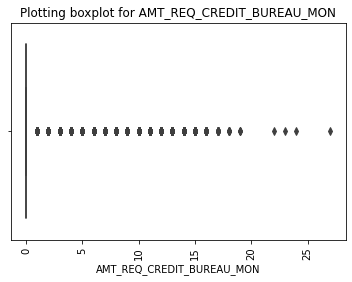

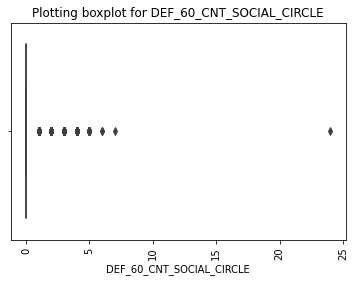

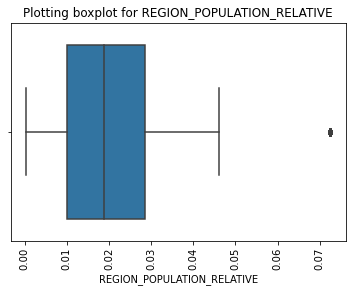

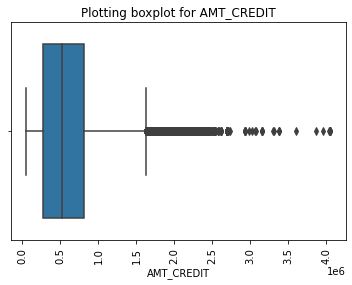

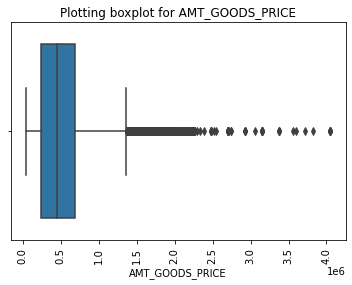

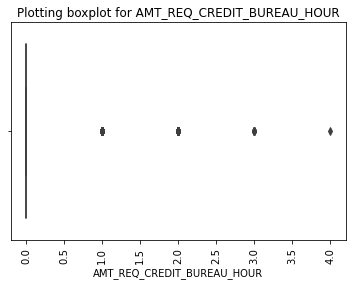

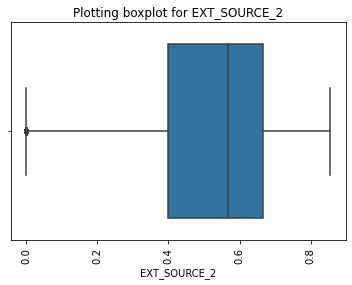

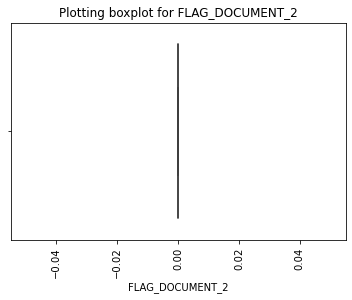

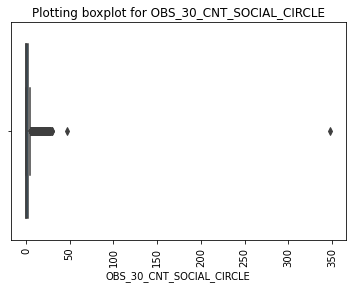

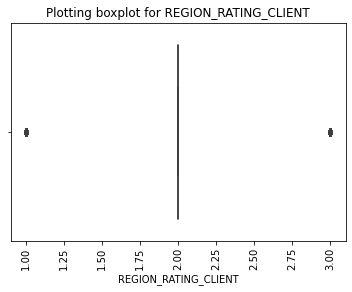

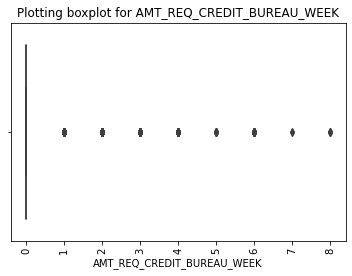

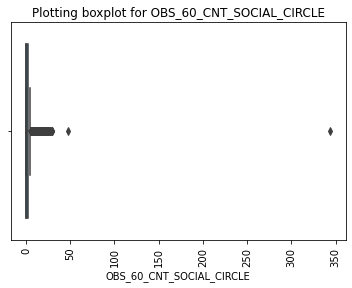

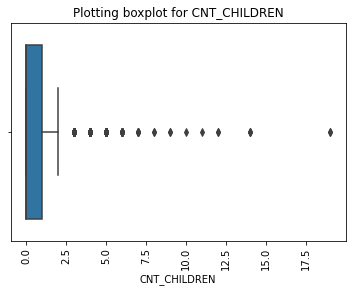

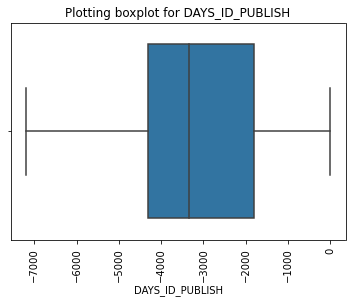

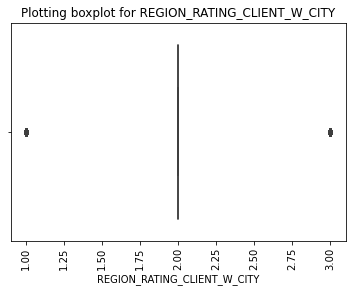

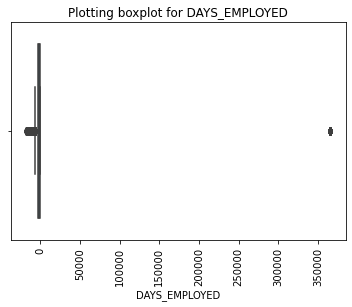

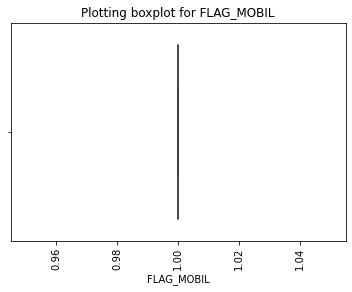

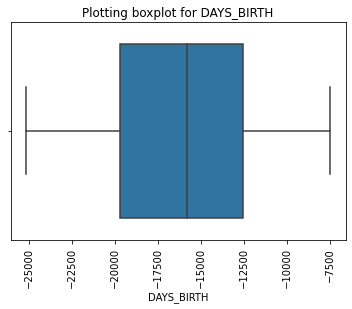

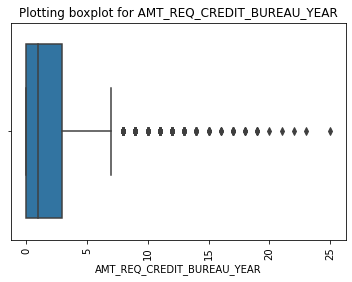

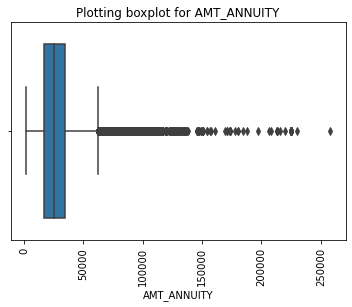

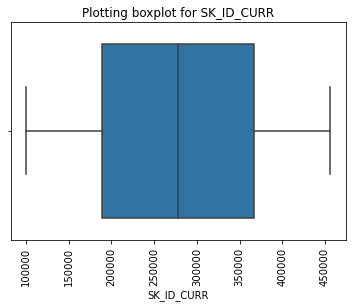

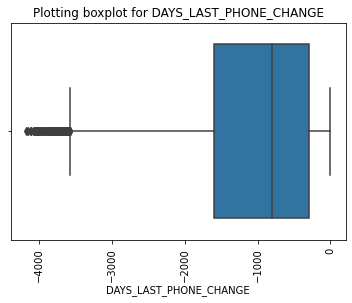

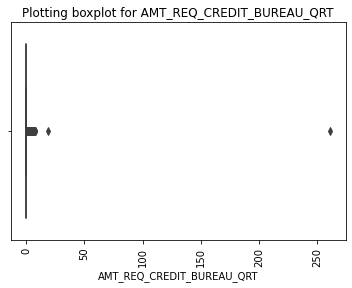

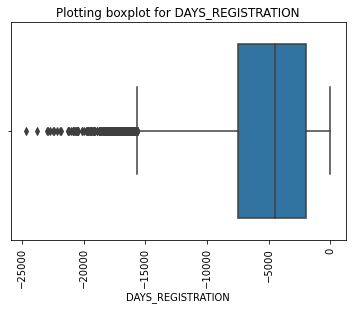

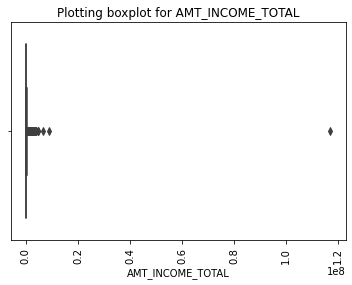

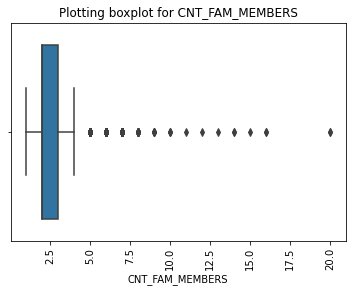

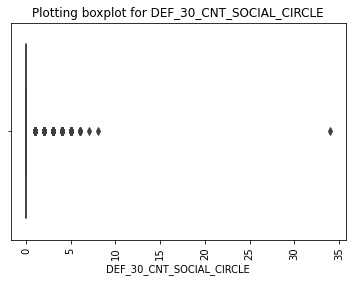

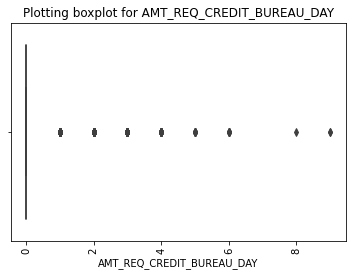

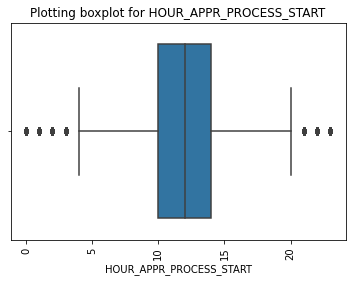

In [40]:
#plotting boxplots for all the numeric columns of application dataset inorder to idenity outliers
for i in num_variables:
    boxplotter(app_data, i) 

**The following columns are having some outliers as per the boxplots so let's check them to make sure there aren't any mistakes with the data**


- CNT_CHILDREN
- AMT_INCOME_TOTAL
- DAYS_EMPLOYED
- CNT_FAM_MEMBERS
- HOUR_APPR_PROCESS_START
- DEF_60_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_QRT
- OBS_30_CNT_SOCIAL_CIRCLE

**The column CNT_CHILDREN seems to have some outliers based on its boxplot, So let's do some univariate analysis on it inorder to determine if these are true outliers or not.**

In [41]:
app_data.CNT_CHILDREN.describe()

count    263423.000000
mean          0.422716
std           0.725929
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [42]:
app_data.CNT_CHILDREN.value_counts(normalize=True).sort_values(ascending=False)*100 #precentage of clients with different numbers of children

0     69.666658
1     20.060511
2      8.871663
3      1.225406
4      0.133625
5      0.028851
6      0.006074
7      0.002278
14     0.001139
8      0.000759
9      0.000759
12     0.000759
19     0.000759
10     0.000380
11     0.000380
Name: CNT_CHILDREN, dtype: float64

In [43]:
app_data.CNT_CHILDREN[app_data.CNT_CHILDREN>10].sum()/app_data.shape[0] *100

0.04365602092452064

**Conclusion: While it is true that only a very small fraction of the clients (0.04 %) have more than 10 children with 19 children being the highest recorded for a client, its not impossible for people to have that many children and such reproductive practies do exist in reality. So we can't say these outliers are due to any error or impossible. So these are not true outliers and we will not remove them.**

**AMT_INCOME_TOTAL seems to have some outliers as per the boxplot. Let's do some univariate analysis to check if these are true outliers or not**

In [44]:
app_data.AMT_INCOME_TOTAL.describe()

count    2.634230e+05
mean     1.711735e+05
std      2.492428e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

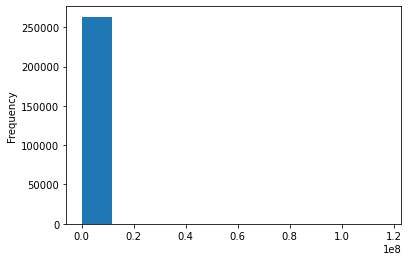

In [45]:
app_data.AMT_INCOME_TOTAL.plot.hist()
plt.show()

**Conclusion: As we can see there are clients with very high income compared to the rest of the clients but we can't say this is an error qw it's possible for some people to be very high earners compared to most others. So we are not considering these as true outliers. However, we don't need the absurdly high values to skew our analysis either so instead we can cap AMT_INCOME_TOTAL at the 99th percentile**

In [46]:
#capping AMT_INCOME_TOTAL at the 99th percentile
app_data.AMT_INCOME_TOTAL.quantile([0.99]) #the 99th percentile of AMT_INCOME_TOTAL is 481500.0
app_data=app_data[app_data.AMT_INCOME_TOTAL<481500]
app_data.shape #checking the shape of the dataset again after the above operation

(260782, 72)

**REGION_POPULATION_RELATIVE seems to have some outliers as per the boxplot. Let's do some univariate analysis to check if these are true outliers or not**

In [47]:
app_data.REGION_POPULATION_RELATIVE.describe()

count    260782.000000
mean          0.020693
std           0.013548
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [48]:
app_data.REGION_POPULATION_RELATIVE[app_data.REGION_POPULATION_RELATIVE>0.07] #checking the REGION_POPULATION_RELATIVE records greater than 0.07

65        0.072508
105       0.072508
111       0.072508
188       0.072508
240       0.072508
            ...   
307165    0.072508
307212    0.072508
307392    0.072508
307486    0.072508
307498    0.072508
Name: REGION_POPULATION_RELATIVE, Length: 6506, dtype: float64

In [49]:
app_data.REGION_POPULATION_RELATIVE[app_data.REGION_POPULATION_RELATIVE>0.07].count() #checking the number of these outliers

6506

In [50]:
app_data[app_data.REGION_POPULATION_RELATIVE>0.07].SK_ID_CURR.duplicated().sum() #checking if there are any duplicate loan IDs appearing here

0

**Conclusion: As we can see here 6996 loans have been taken from the same location as they are having same normalized population of region. This meaning clients of these loans are from the same location which is having a very high population. As population of a region doesn't have any set limit and its entirely possible for a region to be much more highly populated than other regions so we are not considering these records to be true outliers**

**Checking column DAYS_EMPLOYED**

In [51]:
app_data.DAYS_EMPLOYED.describe()

count    260782.000000
mean      63985.128721
std      141487.214949
min      -17912.000000
25%       -2840.000000
50%       -1259.000000
75%        -298.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

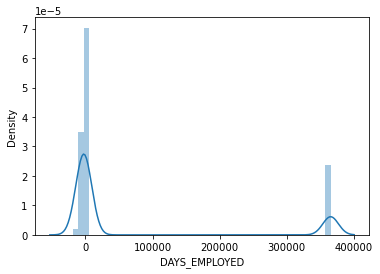

In [52]:
#distplot
sns.distplot(app_data.DAYS_EMPLOYED) 
plt.show()

In [53]:
#quantiles
app_data.DAYS_EMPLOYED.quantile([0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99]) 

0.25     -2840.0
0.50     -1259.0
0.75      -298.0
0.80      -146.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [54]:
app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED>0] #DAYS_EMPLOYED greater than 0

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307463    365243
307469    365243
307483    365243
307487    365243
307505    365243
Name: DAYS_EMPLOYED, Length: 47118, dtype: int64

In [55]:
app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED>0].count()/len(app_data) *100 #percentage of DAYS_EMPLOYED values greater than 0

18.067964813522405

In [56]:
app_data.DAYS_EMPLOYED[app_data.DAYS_EMPLOYED>0].unique()

array([365243], dtype=int64)

**Conclusion: As we can see from the above outputs, for 18% of the clients the relative number of days before the application they started current employment is more than 0 (or positive) and they are all 365243 days (which is more than 1000 years and its impossible for a human to live this long). So this must be some mistake in recording the data and hence we will remove these values from our analysis**

In [57]:
#removing all DAYS_EMPLOYED records of 365243 days
app_data=app_data[app_data.DAYS_EMPLOYED<365243]

In [58]:
app_data.shape

(213664, 72)

**Checking CNT_FAM_MEMBERS**

In [59]:
app_data.CNT_FAM_MEMBERS.describe()

count    213664.000000
mean          2.264855
std           0.941143
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

**Conclusion: mean and median are close enough and its entirely possible for a family to have upto 20 members in cases of big families so there are no outliers in this column**

**Checking HOUR_APPR_PROCESS_START**

In [60]:
app_data.HOUR_APPR_PROCESS_START.describe()

count    213664.000000
mean         12.212984
std           3.284586
min           0.000000
25%          10.000000
50%          12.000000
75%          15.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

**Conclusion: mean and median are close enough and the values are between 0 and 23. A day has upto 24 hrs so no outliers are in this column**

 DEF_60_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_QRT
- OBS_30_CNT_SOCIAL_CIRCLE

**Checking DEF_60_CNT_SOCIAL_CIRCLE**

In [61]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    213664.000000
mean          0.097611
std           0.358342
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Conclusion: no outliers as mean and median are close enough and the max value is also valid**

**Checking AMT_REQ_CREDIT_BUREAU_QRT**

In [62]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    213664.000000
mean          0.260619
std           0.828052
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [63]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      173666
1.0       26954
2.0       11255
3.0        1340
4.0         365
5.0          49
6.0          21
8.0           6
7.0           6
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

**Conclusion: even though 261 enquiries about a client in 1 quarter is an outlier here for AMT_REQ_CREDIT_BUREAU_QRT compared to the rest of the values, its still a valid value. So we are not considering this as a true outlier**

**Checking OBS_30_CNT_SOCIAL_CIRCLE**

In [64]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    213664.000000
mean          1.429267
std           2.424706
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [65]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      113149
1.0       34578
2.0       21016
3.0       14388
4.0        9982
5.0        6709
6.0        4490
7.0        3076
8.0        2061
9.0        1393
10.0        922
11.0        593
12.0        455
13.0        269
14.0        180
15.0        114
16.0         86
17.0         58
19.0         36
18.0         32
21.0         17
20.0         17
22.0         11
23.0          9
25.0          6
24.0          5
27.0          5
26.0          2
30.0          2
47.0          1
29.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

**Conclusion: even though 348 observations of a client's social surroundings with observable 30 DPD (days past due) default, is an outlier here for OBS_30_CNT_SOCIAL_CIRCLE compared to the rest of the values, its still a valid value. So we are not considering this as a true outlier**

#### Outlier handling done for application data

## Data analysis

### Target variable and handling imbalance in data

In [66]:
#percentage of people with payment dfficulties(1) vs People with all other cases(0)
app_data.TARGET.value_counts(normalize=True)*100 

0    91.657462
1     8.342538
Name: TARGET, dtype: float64

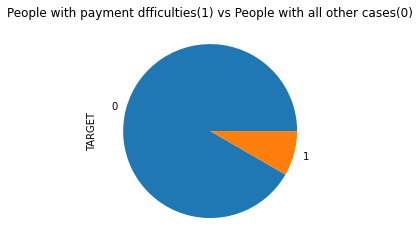

In [67]:
#pie chart of People with payment dfficulties(1) vs People with all other cases(0)
app_data.TARGET.value_counts(normalize=True).plot.pie() 
plt.title(label='People with payment dfficulties(1) vs People with all other cases(0)')
plt.show()

So its clear from the above outputs that there is imbalance in our target variable as only around 8 % of people have payment difficulties vs people with all other cases (over 92 %)

So the ratio of imbalance is 92 : 8

Inorder to deal with this imbalance, we can split the application dataset into 2 categories: 
1. People with payment difficulties
2. People with all other cases

In [68]:
#splitting application dataset into People with payment difficulties and all other cases

app_data_defaulter= app_data[app_data.TARGET==1] #People with payment difficulties
app_data_all_other_cases= app_data[app_data.TARGET==0] #all other cases

**Sanity checks**

In [69]:
app_data_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [70]:
app_data_all_other_cases.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [71]:
app_data_defaulter.shape

(17825, 72)

In [72]:
app_data_all_other_cases.shape

(195839, 72)

### Analysing Categorical variables (Bivariate analysis)

In [73]:
#finding the categorical variables in application data
categorical_vars= list(set(app_data.columns) - set(app_data.describe().columns))
categorical_vars

['NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'ORGANIZATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [74]:
#creating a custom function that will take a defaulters dataset, all other cases dataset and a categorical column.
#Then it will return pie chart and bar plot for that column for both defaulters and all other cases dataset passed
def categoricalAnalyser(defaulterData, allCasesData, column):
    data1= defaulterData
    data2= allCasesData
    col= column
    
    fig= plt.figure(figsize=(12,10))
    
    #plotting pie chart for defaulters
    ax1 = plt.subplot(221)
    data1[col].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting for the defaulters in column '+col+' in percentage')
    
    #plotting bar chart for defaulters
    ax2= plt.subplot(222)
    data1[col].value_counts(normalize=True).plot.barh(ax=ax2)
    plt.title('Plotting for the column '+col)
    
    #plotting pie chart for all other cases
    ax3 = plt.subplot(223)
    data2[col].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%", ax=ax3)
    plt.title('Plotting for all other cases in column '+col+' in percentage')
    
    #plotting bar chart for defaulters
    ax4= plt.subplot(224)
    data2[col].value_counts(normalize=True).plot.barh(ax=ax4)
    plt.title('Plotting for the column '+col+' in percentage')
    
    fig.tight_layout()
    plt.show()

Plotting data for the column NAME_FAMILY_STATUS


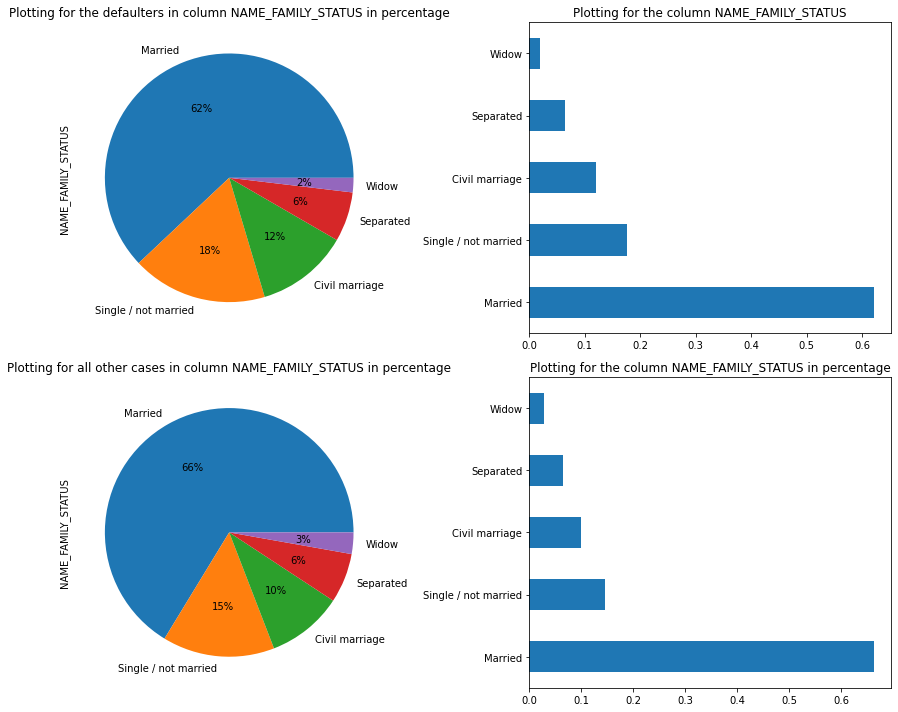

Plotting data for the column FLAG_OWN_CAR


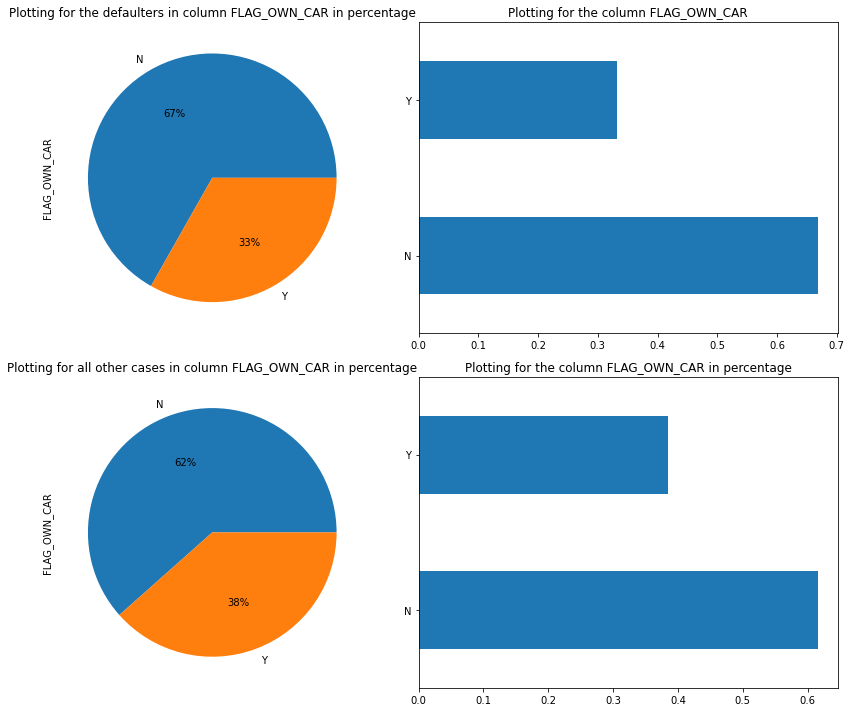

Plotting data for the column NAME_HOUSING_TYPE


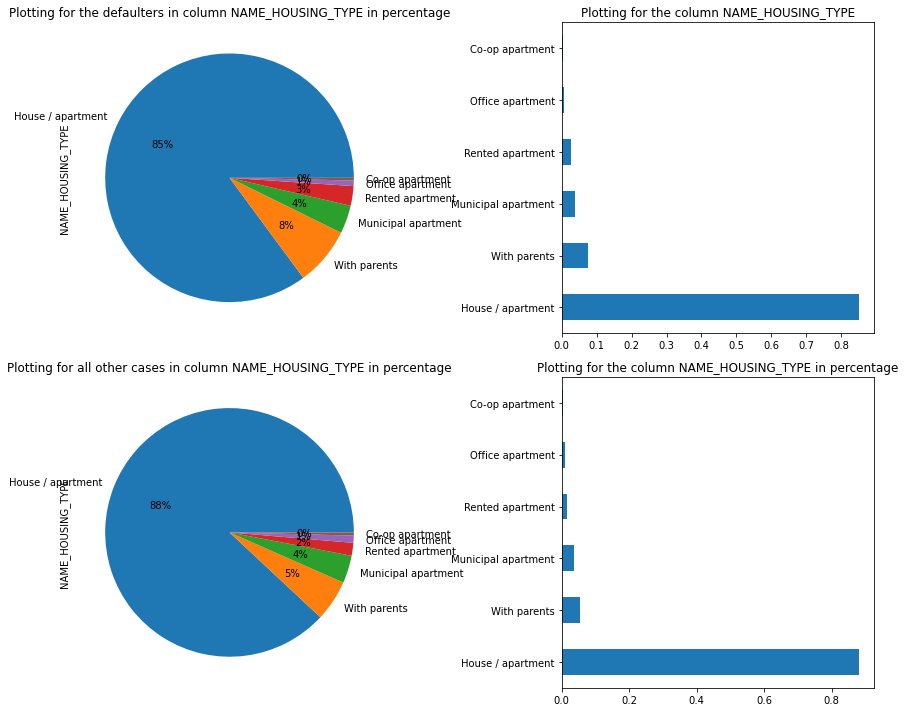

Plotting data for the column NAME_TYPE_SUITE


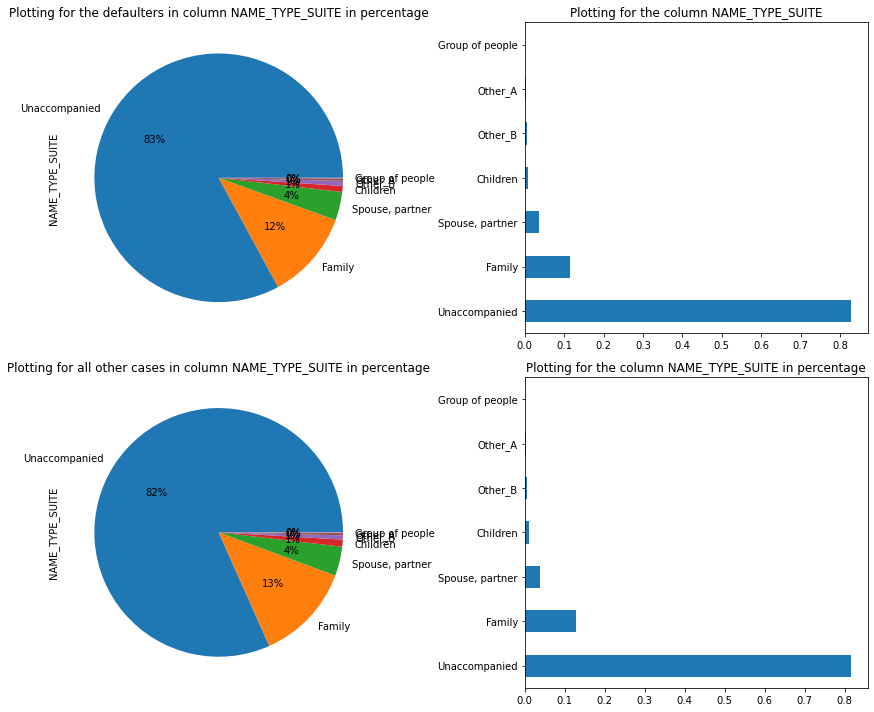

Plotting data for the column CODE_GENDER


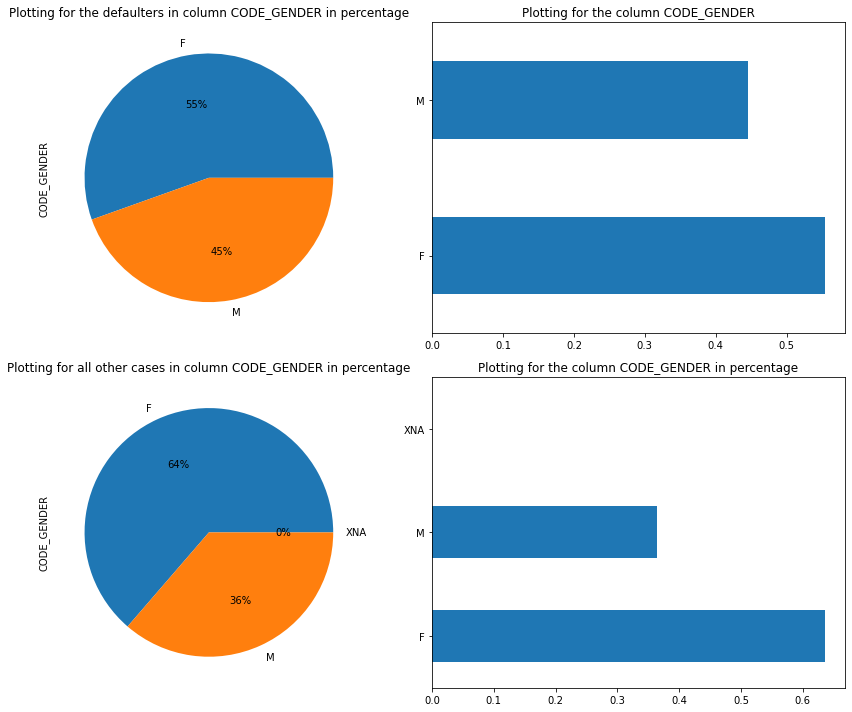

Plotting data for the column FLAG_OWN_REALTY


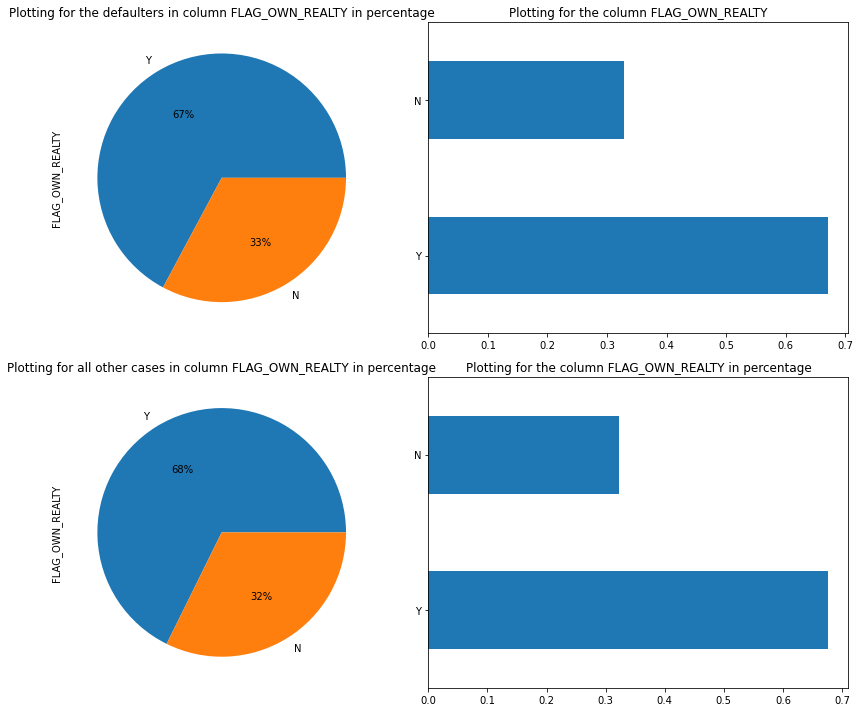

Plotting data for the column ORGANIZATION_TYPE


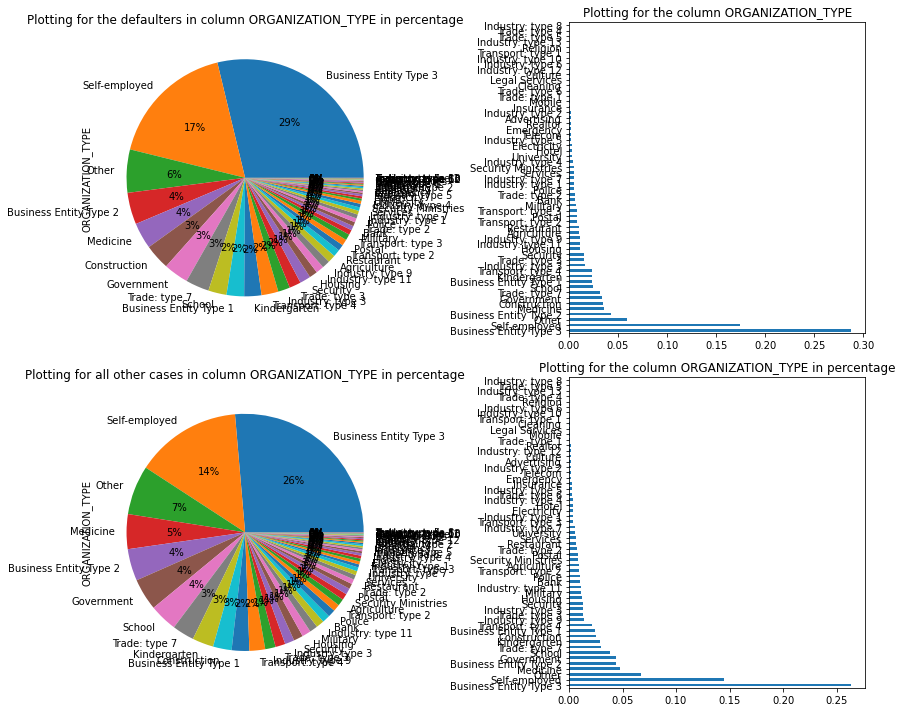

Plotting data for the column NAME_EDUCATION_TYPE


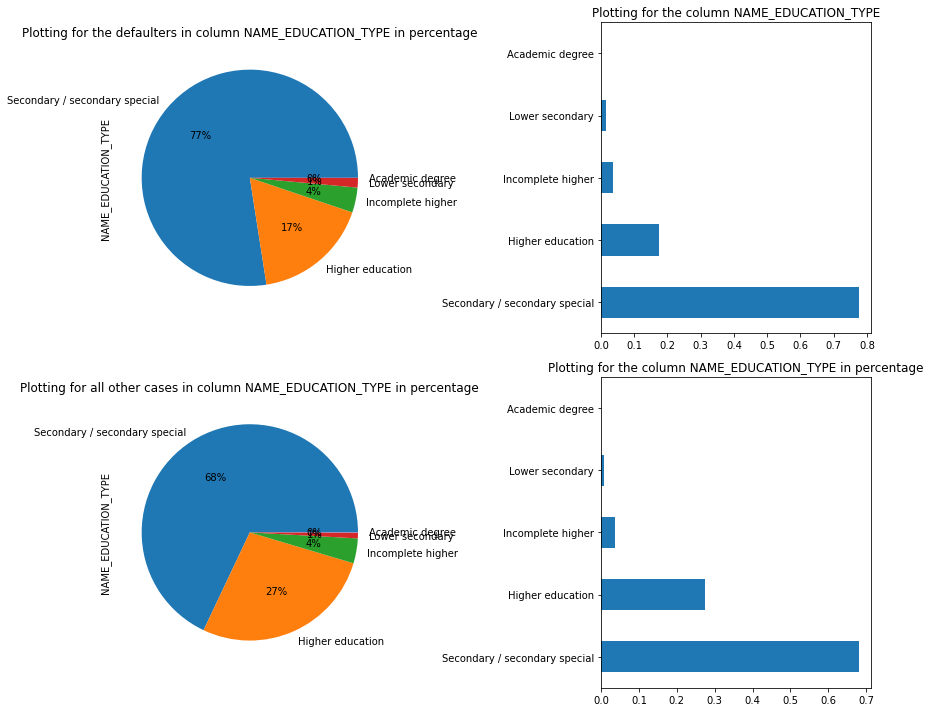

Plotting data for the column NAME_CONTRACT_TYPE


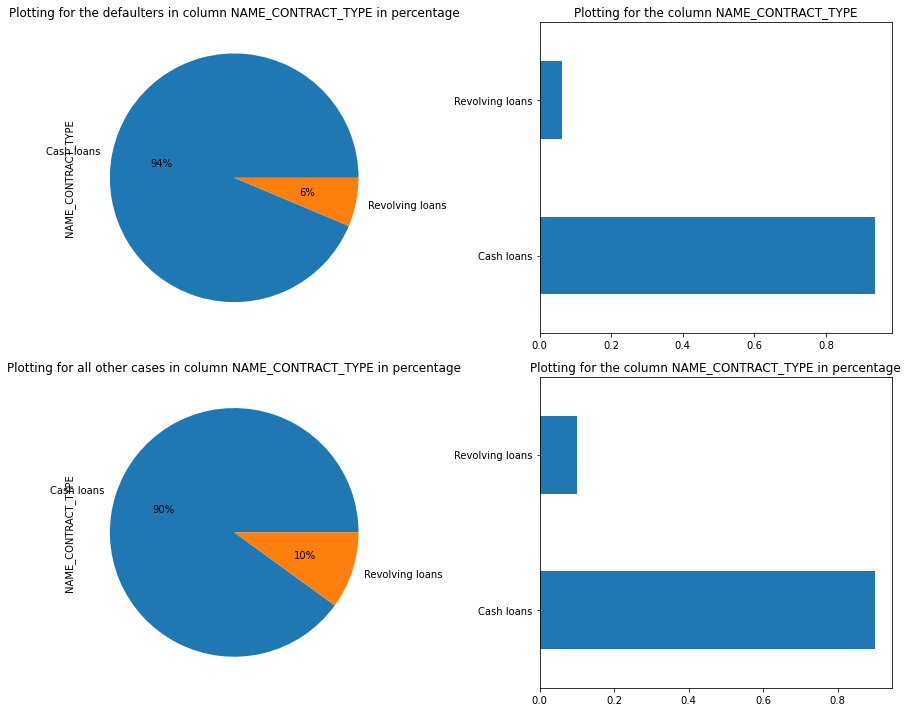

Plotting data for the column WEEKDAY_APPR_PROCESS_START


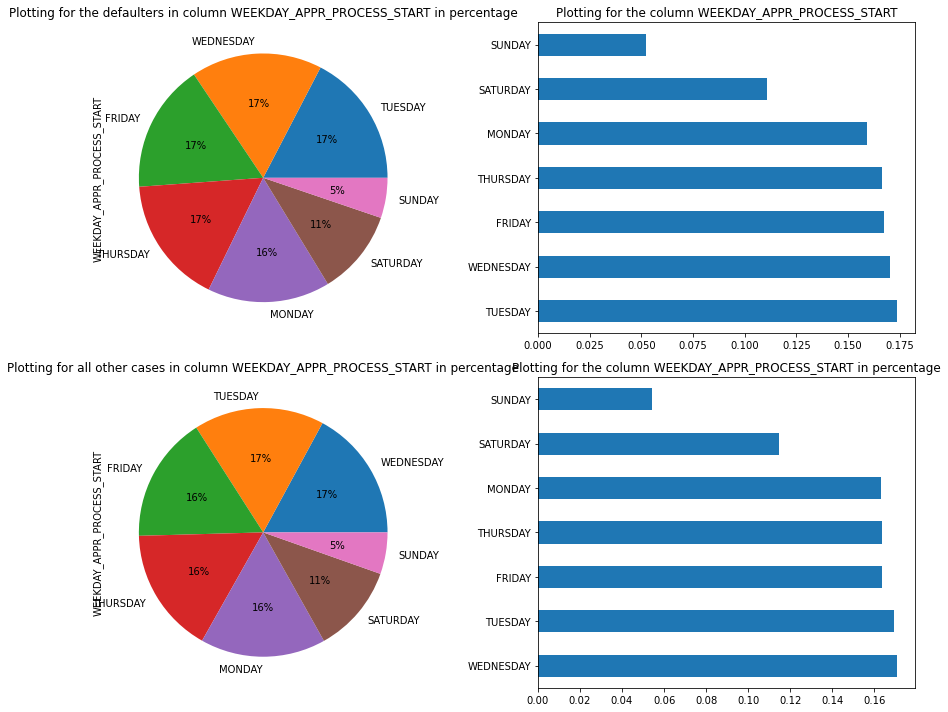

Plotting data for the column OCCUPATION_TYPE


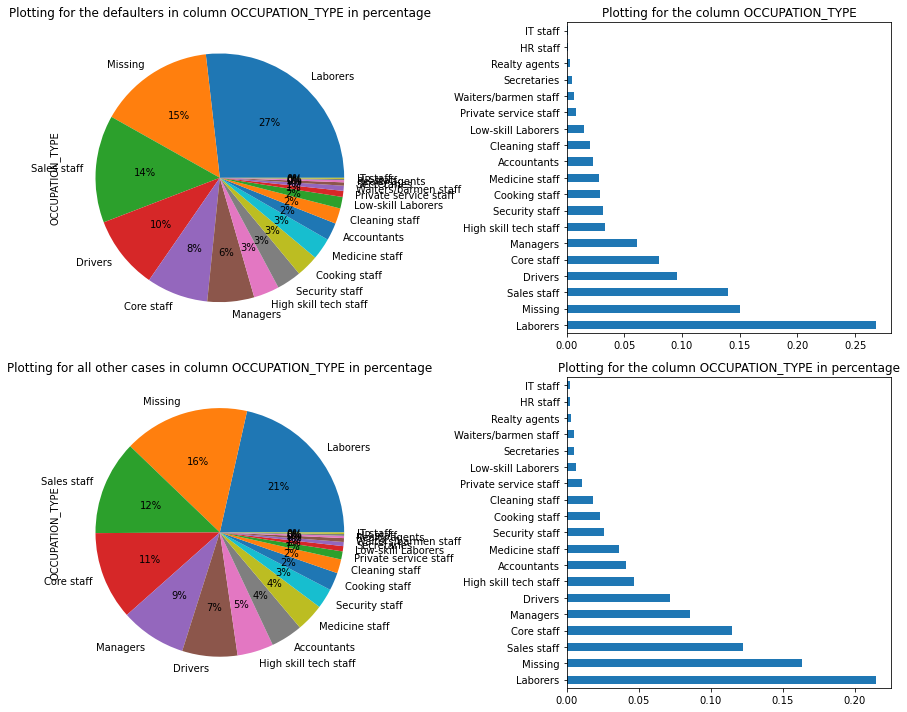

Plotting data for the column NAME_INCOME_TYPE


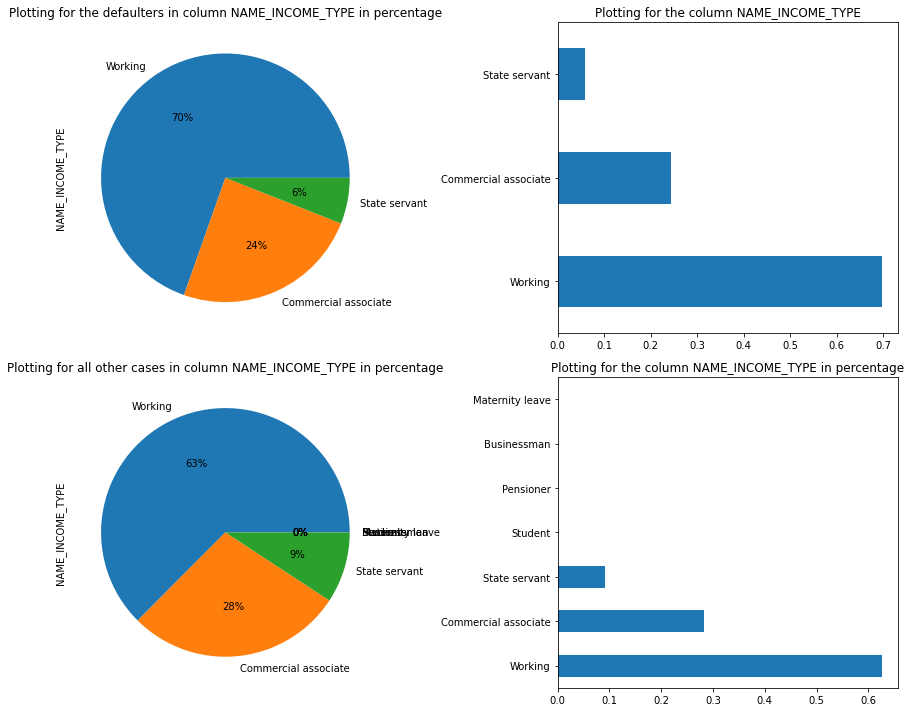

In [75]:
for i in categorical_vars:
    print('Plotting data for the column '+i)
    categoricalAnalyser(app_data_defaulter, app_data_all_other_cases, i)

Not able to form any meaningful conclusions from the above analysis as the insights are same for both defaulters (people with payment difficulties) and all other causes. 

For e.g., by looking at the pie and bar plots for defaulters for column Occupation type, it looks like the labourers and sales staff are the ones defaulting the most (ignoring the missing category). 

However at the same time, if we look at the pie and barplots for the same column for all other cases (people who didn't default), it looks like the labourers and Sales Staff are the ones returning the money in time the most.

So we can't conclude if its safe to lend to labourers and sales staff or not from the above analysis alone.

Therefore, let's try multivariate analysis by combining numerical and categorical variables at the same time.

In [76]:
num_variables

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_2',
 'FLAG_MOBIL',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'SK_ID_CURR'}

### OCCUPATION_TYPE vs Target

In [77]:
app_data.groupby(by='OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False) #percentage of defaulters from each occupation type

OCCUPATION_TYPE
Low-skill Laborers       0.167291
Waiters/barmen staff     0.108775
Drivers                  0.107950
Cooking staff            0.102711
Laborers                 0.101970
Security staff           0.100831
Sales staff              0.093914
Cleaning staff           0.091650
Realty agents            0.080775
Missing                  0.077385
Secretaries              0.068505
Medicine staff           0.065617
Private service staff    0.063956
Managers                 0.060812
High skill tech staff    0.060591
IT staff                 0.060046
Core staff               0.059799
HR staff                 0.057143
Accountants              0.047910
Name: TARGET, dtype: float64

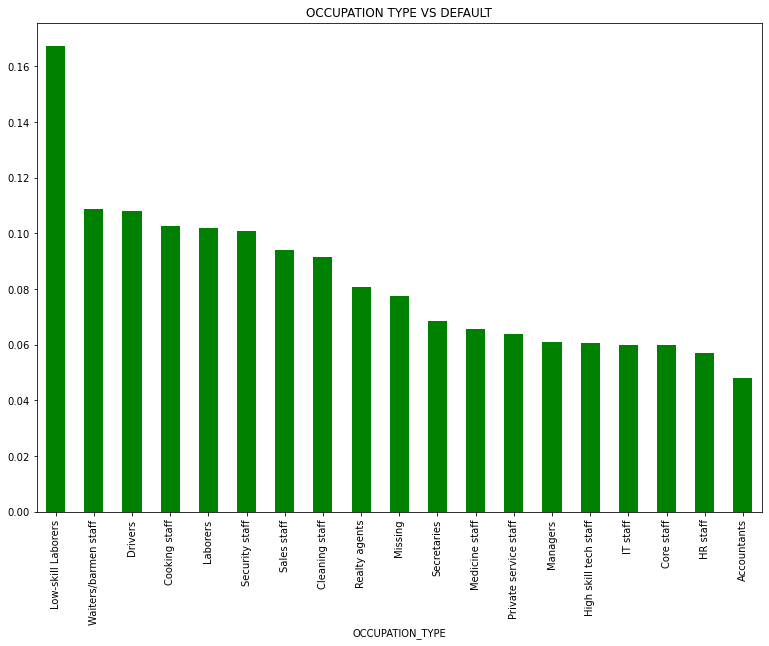

In [78]:
#barplot for defaulters
plt.figure(figsize=(13,9))
app_data.groupby(by='OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar(color='Green')
plt.title('OCCUPATION TYPE VS DEFAULT')
plt.show()

In [79]:
#copying application dataset into a fresh dataframe
app_data2= app_data.copy()
app_data2.shape

(213664, 72)

In [80]:
#creating a new column All_cases which will be 1 if client falls under 'all other cases' and 1 if they are in 'Payment difficulties category'
app_data2['All_cases']= app_data2.TARGET.apply(lambda x: 1 if x==0 else 0)
app_data2[['TARGET', 'All_cases']].head()

,TARGET,All_cases
0,1,0
1,0,1
2,0,1
4,0,1
5,0,1


In [81]:

app_data2.groupby(by='OCCUPATION_TYPE')['All_cases'].mean().sort_values(ascending=False)

OCCUPATION_TYPE
Accountants              0.952090
HR staff                 0.942857
Core staff               0.940201
IT staff                 0.939954
High skill tech staff    0.939409
Managers                 0.939188
Private service staff    0.936044
Medicine staff           0.934383
Secretaries              0.931495
Missing                  0.922615
Realty agents            0.919225
Cleaning staff           0.908350
Sales staff              0.906086
Security staff           0.899169
Laborers                 0.898030
Cooking staff            0.897289
Drivers                  0.892050
Waiters/barmen staff     0.891225
Low-skill Laborers       0.832709
Name: All_cases, dtype: float64

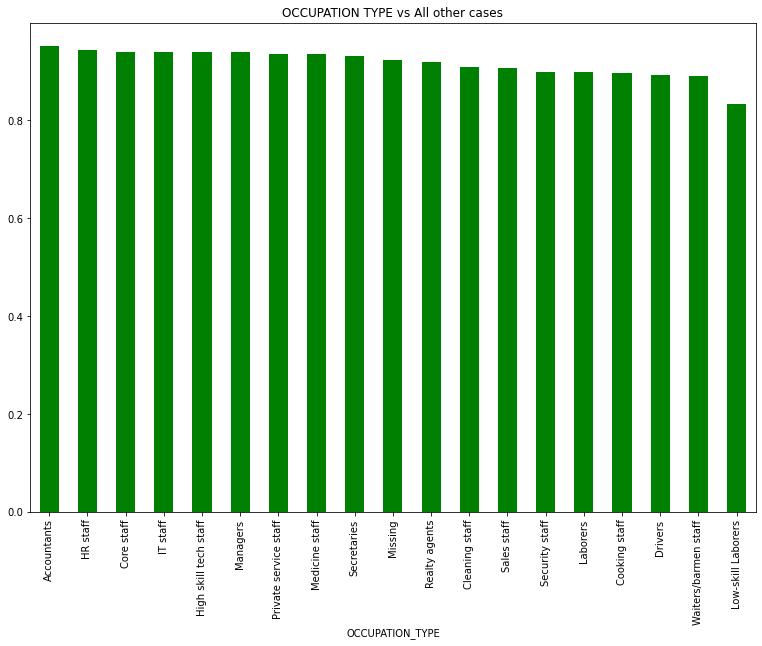

In [82]:
plt.figure(figsize=(13,9))
app_data2.groupby(by='OCCUPATION_TYPE')['All_cases'].mean().sort_values(ascending=False).plot.bar(color='Green')
plt.title('OCCUPATION TYPE vs All other cases')
plt.show()

#### Observations: 

As we can see from the above plot and analysis:  ly to 
1. Low-skill Laborers, Waiters/barmen staff, Drivers, Cooking staff, Laborers,etc are more likely to have payment difficulties more than other occupation types. This is probab;y due to the lower salaries for these occupations. So its risky to approve loans to these people.
2. On the other hand Accountants, HR staff, Core staff, IT staff, High skill tech staff and managers, etc are much more likely to not have any payment difficulties which can be attributed to their higher salaries. So we can approve loans to these people  with much lower risk..

In this way we can check for all the different columns

In [83]:
#creating custom function that will take application data and a column, and then plot pie and bar charts
#showing percentages of default for that passed column 

def DefaultAnalyser(defaulterData, column):
    data1= defaulterData
    col= column
    
    fig= plt.figure(figsize=(15,10))
    
    #plotting pie chart for defaulters
    ax1 = plt.subplot(221)
    data1.groupby(by=col)['TARGET'].mean().plot.pie(autopct = "%1.0f%%",ax=ax1)
    plt.title('Plotting defaulters data for the column '+col+' in percentage')
    
    #plotting bar chart for defaulters
    ax2= plt.subplot(222)
    data1.groupby(by=col)['TARGET'].mean().sort_values(ascending=False).plot.bar(ax=ax2, color='Green')
    plt.title('Plotting defaulters data for the column '+col+' in percentage')
    
    fig.tight_layout()
    plt.show()

Plotting column NAME_FAMILY_STATUS


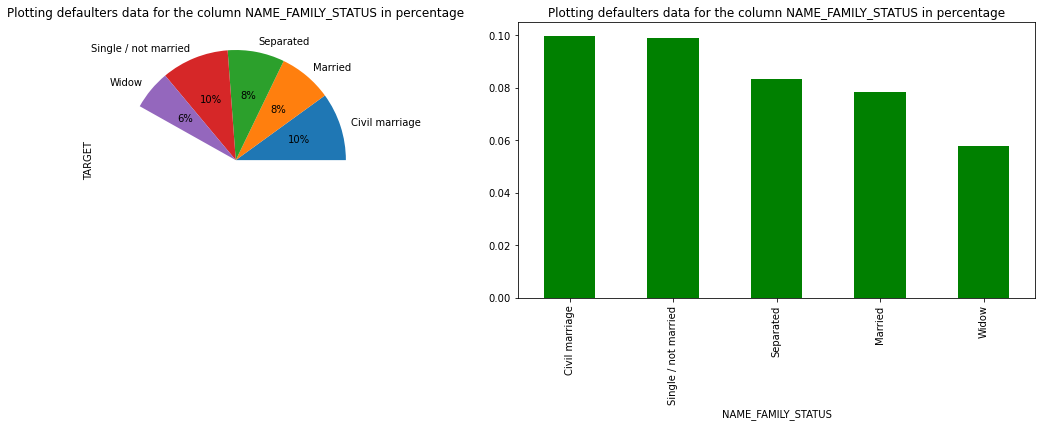

Plotting column FLAG_OWN_CAR


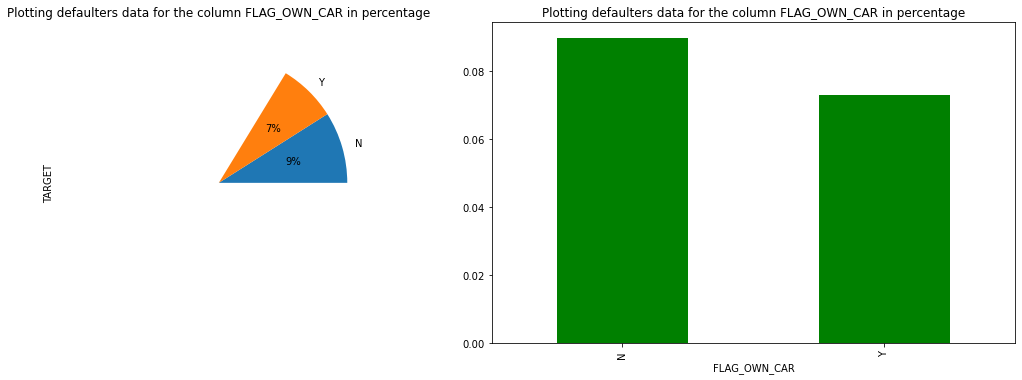

Plotting column NAME_HOUSING_TYPE


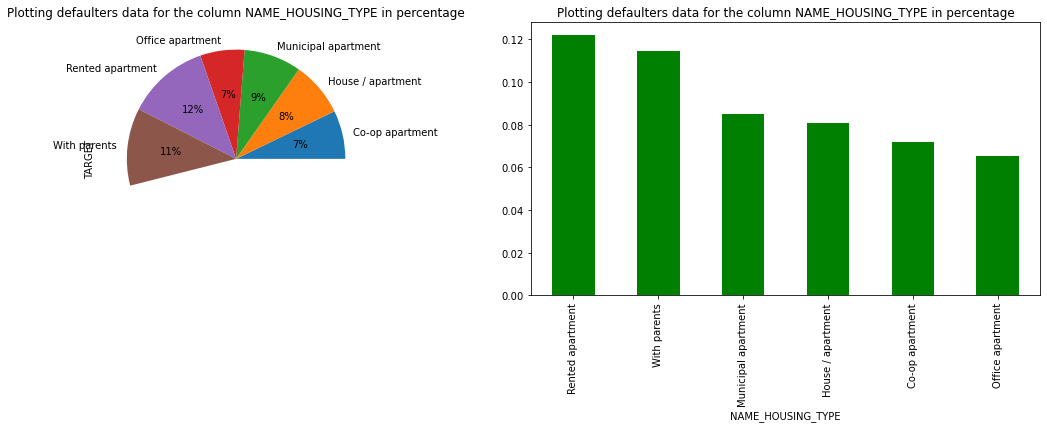

Plotting column NAME_TYPE_SUITE


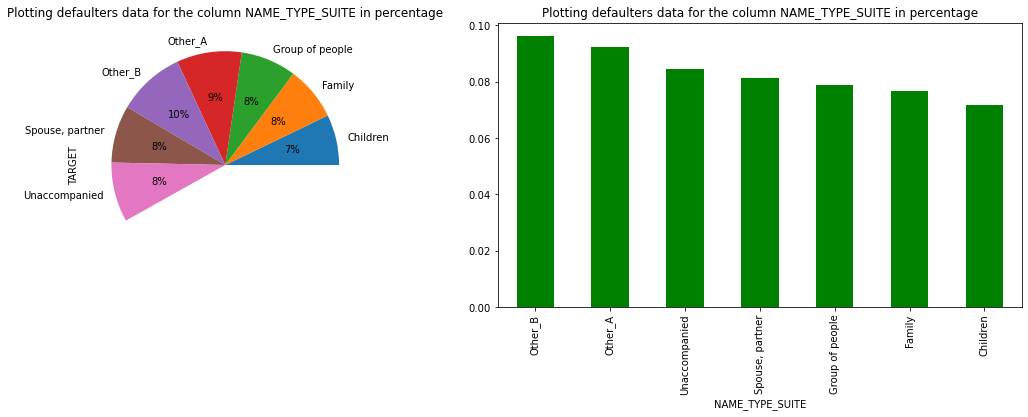

Plotting column CODE_GENDER


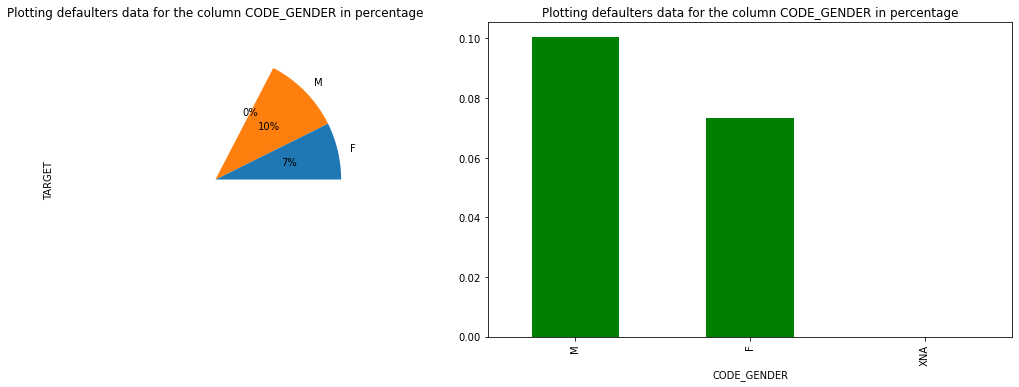

Plotting column FLAG_OWN_REALTY


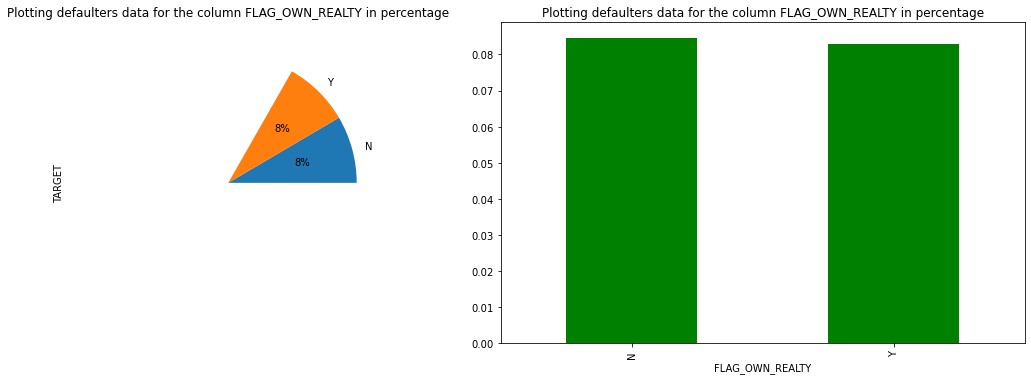

Plotting column ORGANIZATION_TYPE


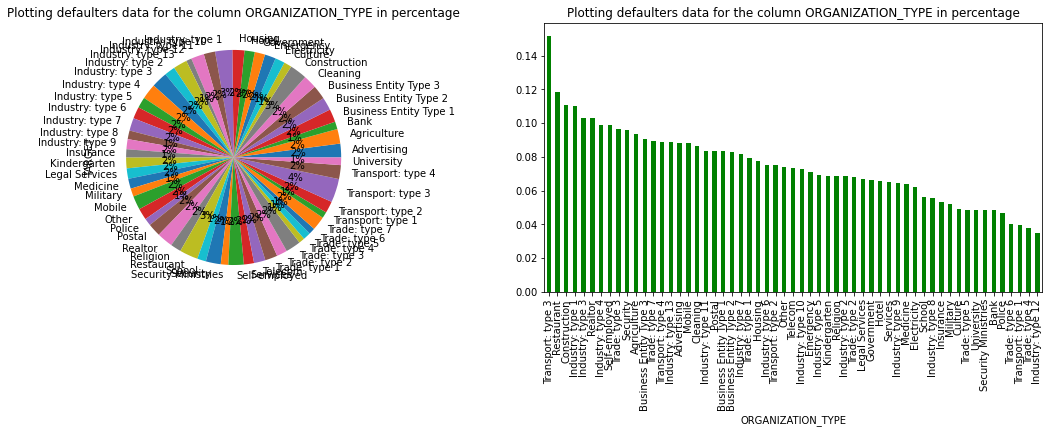

Plotting column NAME_EDUCATION_TYPE


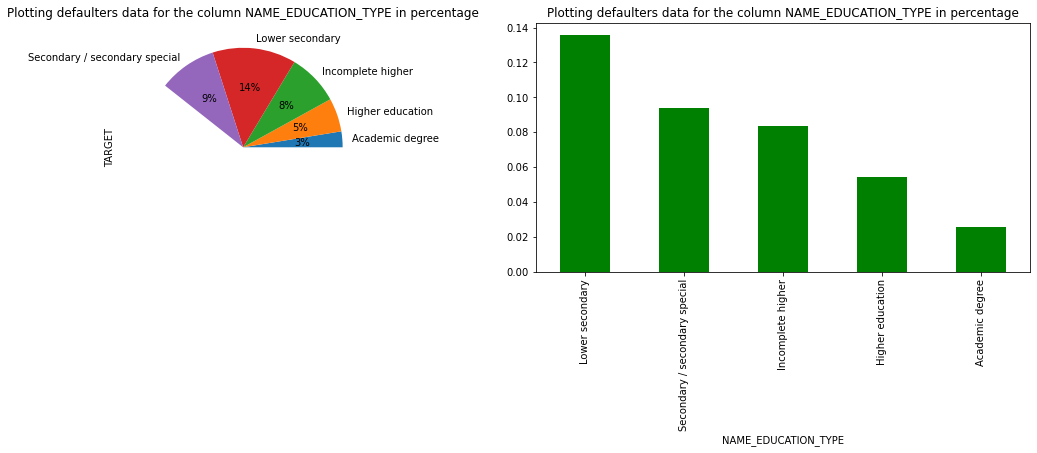

Plotting column NAME_CONTRACT_TYPE


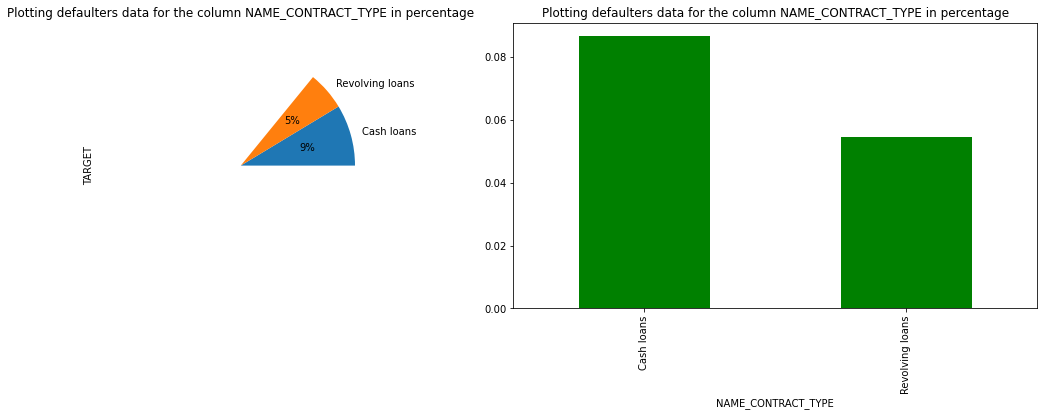

Plotting column WEEKDAY_APPR_PROCESS_START


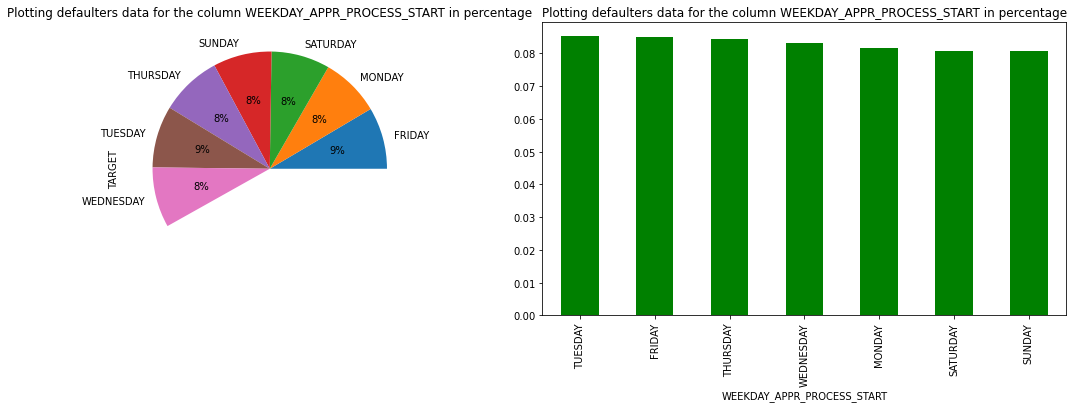

Plotting column OCCUPATION_TYPE


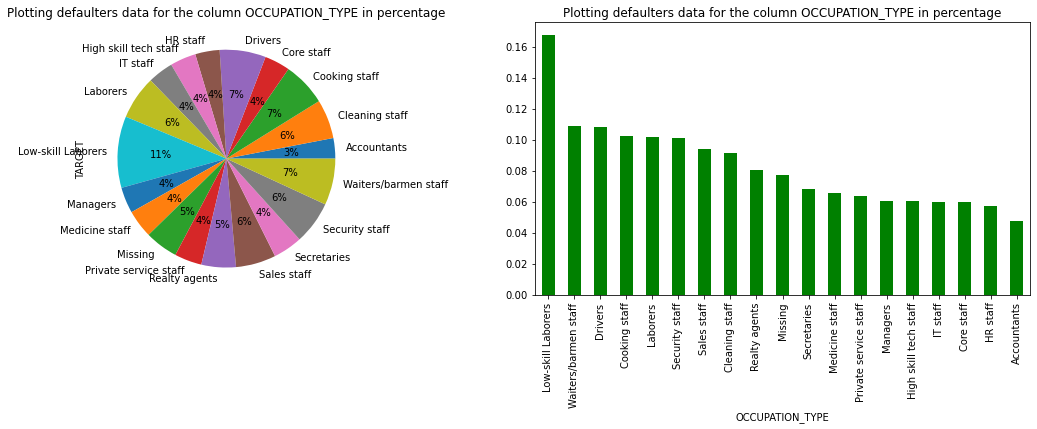

Plotting column NAME_INCOME_TYPE


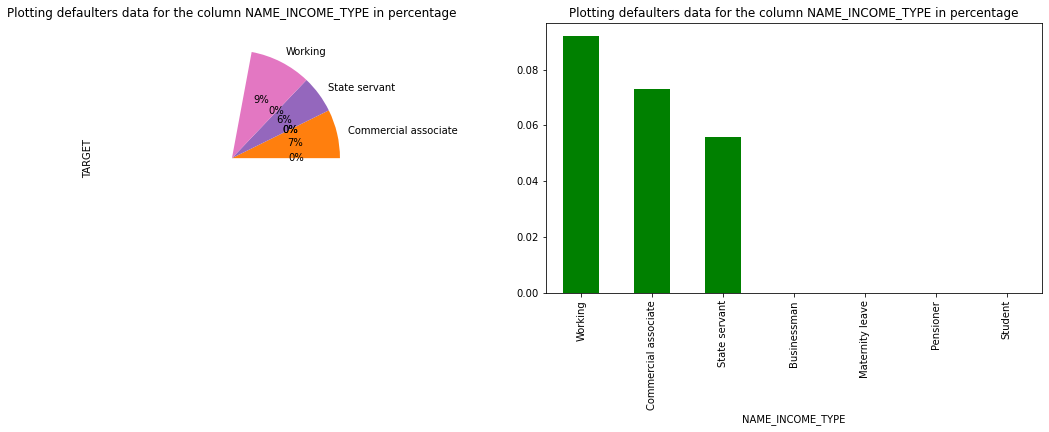

In [84]:
for i in categorical_vars:
    print('Plotting column '+ i)
    DefaultAnalyser(app_data, i)

#### Observations:

1. In education type column, we can see people with education upto lower secondary level and secondary/secondary special levels are more likey to have payment difficulties. This is probably due the fact people with less education tend to get low paying jobs and so their income is lower. On the otherhand, people with Academic degrees and higher education are less likely to default.
2. In the gender column, we can see that males are more likely to default then females. This is probably due to most females being housewives and are supported by their husbands so they don't need to request for loans as often.
3. In the column Name_type_suite, we saw that people who are accompanied by individuals of 'Other' categories are more likey to have payment difficulties than those who are accompanied by children and family. This might be because people who face payment difficulties are given wrpng advise regarding loans by third parties or maybe fraudsters.
4. In the column organization type, we can see that people from transport, restaurant and construction type organizations are more likely to default. This is probably due to lower salaries. On the otherhand, people from industy and trade are less likely to default
5. In family status column, we can see that clients of civil marriage and those who are single/unmarried are more likely to have payment issues than clients who are widows or married.
6. In columns Income type, we can see that working people and commarcial associates are more likely to default as opposed to students and pensioners. This is probably because students are usually financially supported by their parents so they don't need to take loans often, and clients with pension are financially more secure than working people so they don't need to worry about loans either. 
7. in column Name contract type, we found that cash loans usually face more default cases than revolving loans. This is probably due to the different nature and pay structure of these different types of loans.
8. In Occupation type, we found that low skill laboureres, waiters/barmen, drivers, etc are more likely to face payment difficulties probably due to their lower income levels. Hoever, accountants, HR stff, IT staff and managers are more likely capable of paying their due installments in time.
9. We also saw, people who do not own cars are more likely to have payment difficulties than car owners.
10. Finally, clients living in rented apartments or those who are living with their parents are more likely to face payment difficulties than those who are living in office apartments or co-operative apartments. People who rent apratments or those living with their parents may indicate lower income level or higher living expenses which makes them riskier to be approved loans.

### Multivariate analysis using heatmap:

In [85]:
#quantiles that we will use for binning to create a new categorical variable called 'Income_level'
app_data.AMT_INCOME_TOTAL.quantile([0,0.25,0.50,0.75,1])

0.00     26550.0
0.25    112500.0
0.50    157500.0
0.75    211500.0
1.00    479250.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [86]:
def Income(x): #function for creating new categorical variable Income_level which segregates the clients based on the quantiles of the Income
    if x>= 26550 and x<=112500:
        return 'Low earner'
    elif x>112500 and x<=157500.0:
        return 'Middle earner'
    elif x>157500 and x<=211500.0:
        return 'High earner'
    elif x>211500 and x<=479250.0:
        return 'Very High earner'


In [87]:
#creating variable Income_level
app_data['Income_level']= app_data.AMT_INCOME_TOTAL.apply(Income)

In [88]:
#sanity check for Income_level
app_data[['AMT_INCOME_TOTAL', 'Income_level']]

,AMT_INCOME_TOTAL,Income_level
0,202500.0,High earner
1,270000.0,Very High earner
2,67500.0,Low earner
4,121500.0,Middle earner
5,99000.0,Low earner
...,...,...
307502,94500.0,Low earner
307503,112500.0,Low earner
307508,153000.0,Middle earner
307509,171000.0,High earner


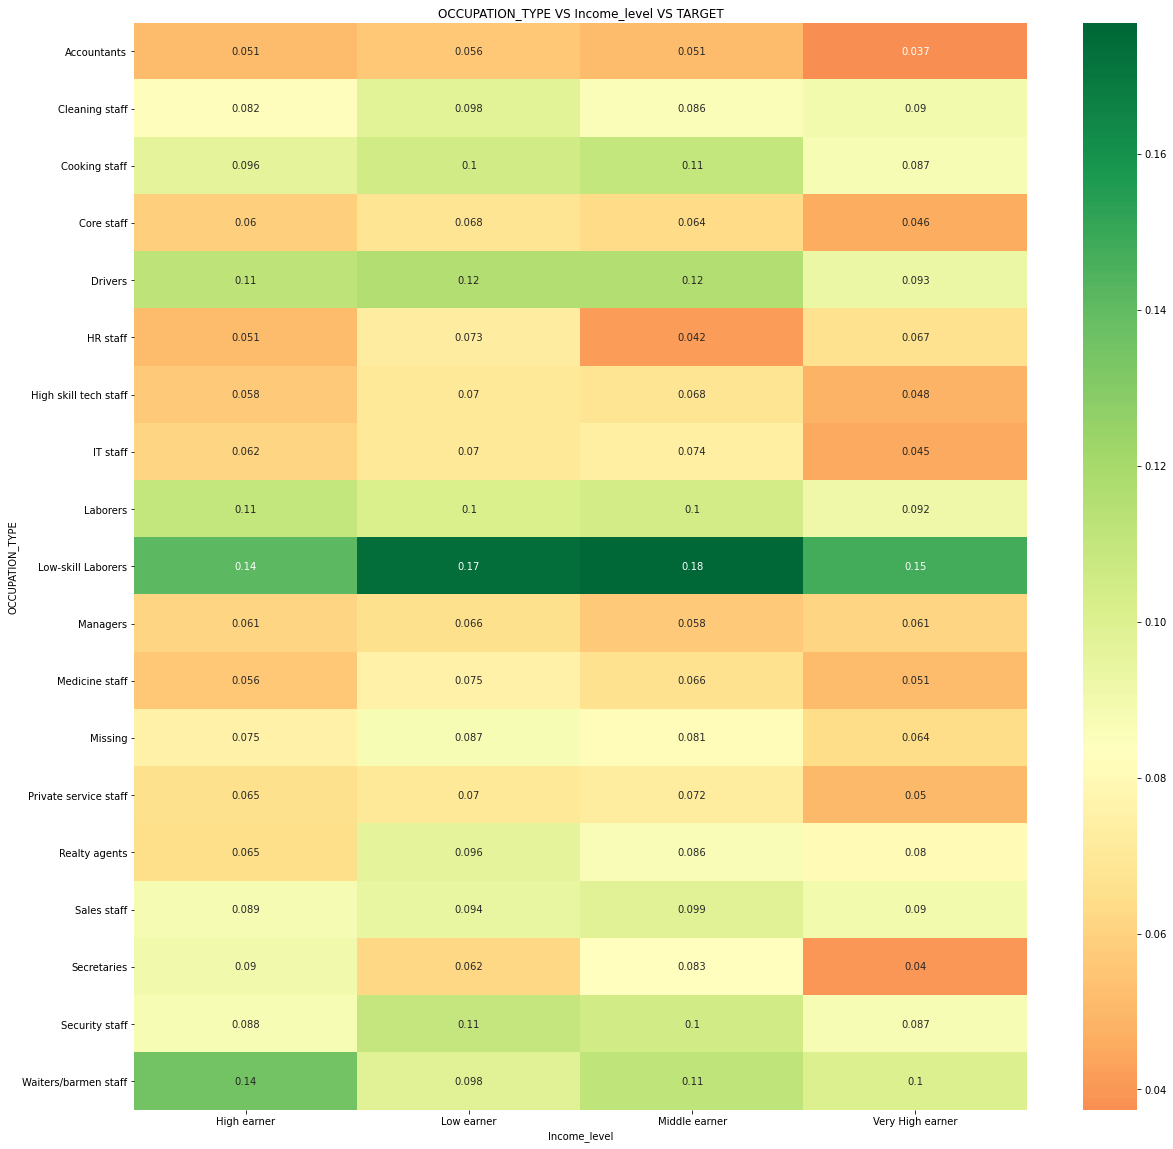

In [89]:
#OCCUPATION_TYPE VS Income_level VS TARGET
plt.figure(figsize=(20,20))
piv= pd.pivot_table(index=['OCCUPATION_TYPE'], columns='Income_level', values='TARGET', aggfunc=np.mean, data= app_data)
sns.heatmap(piv, cmap='RdYlGn', center=np.mean(app_data.TARGET), annot=True)
plt.title('OCCUPATION_TYPE VS Income_level VS TARGET')
plt.show()

#### Observations: 

The above heatmap reinforeces our previous observations firmly. We can clearly see that low skill labourers and waiters  who earn lesss are high risk clients as opposed to Accountants, HR staff, core staff, high skill tech staff and secretaries who are at High or Very High income levels or middle income levels.

### Analysis of Numerical variables

In [ ]:
pd.pivot_table(index='TARGET', columns=list(app_data.describe().columns)[2:10], aggfunc=np.corrcoef, data= app_data)

In [91]:
num_variables

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_2',
 'FLAG_MOBIL',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'SK_ID_CURR'}

In [116]:
def num_var_analysis(dataset, column):
    data= dataset
    col= column
    
    plt.figure(figsize=(7,7))
    data.groupby(by='TARGET')[col].mean().plot.barh()
    plt.show()

Plotting for column AMT_REQ_CREDIT_BUREAU_MON


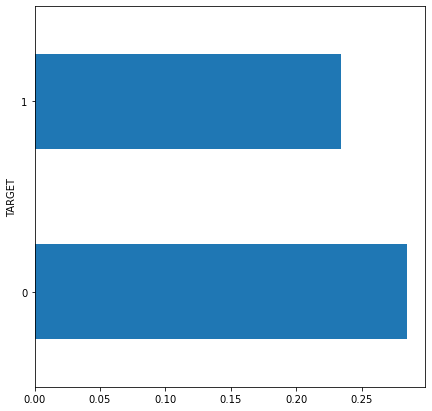

Plotting for column DEF_60_CNT_SOCIAL_CIRCLE


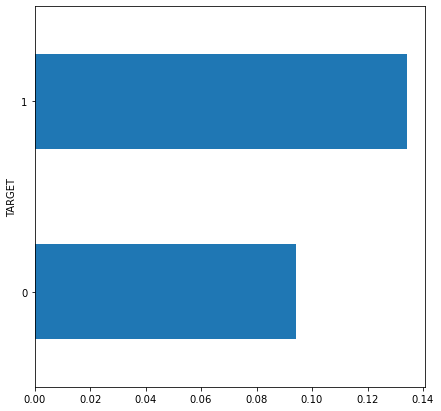

Plotting for column REGION_POPULATION_RELATIVE


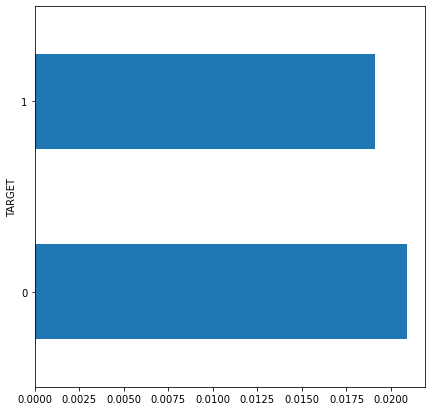

Plotting for column AMT_CREDIT


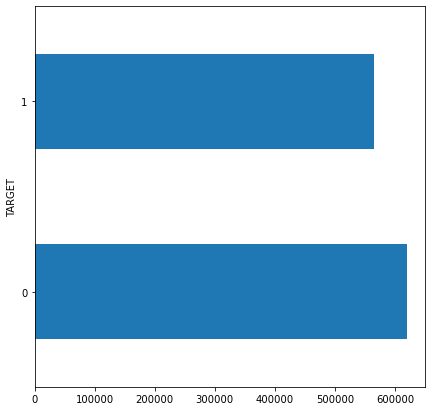

Plotting for column AMT_GOODS_PRICE


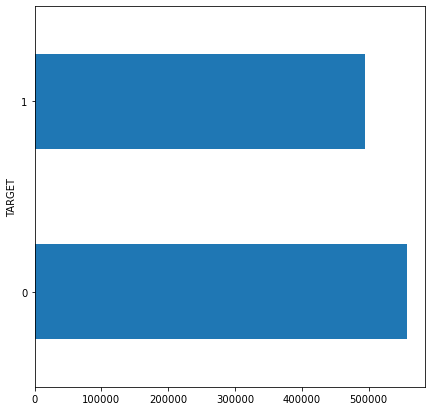

Plotting for column AMT_REQ_CREDIT_BUREAU_HOUR


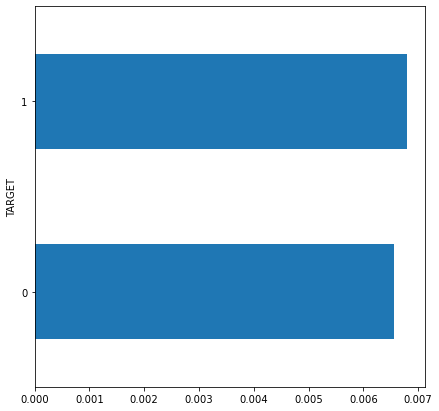

Plotting for column EXT_SOURCE_2


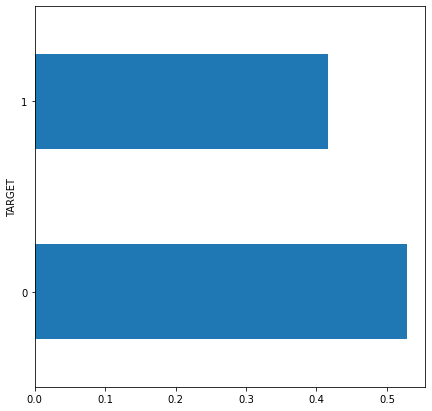

Plotting for column FLAG_DOCUMENT_2


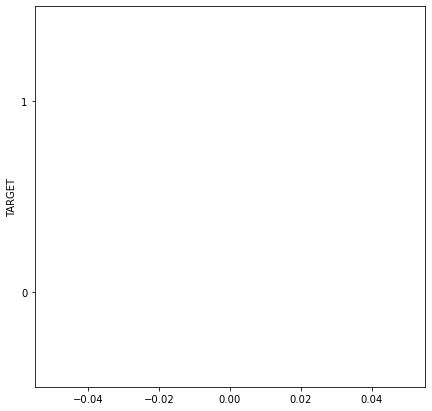

Plotting for column OBS_30_CNT_SOCIAL_CIRCLE


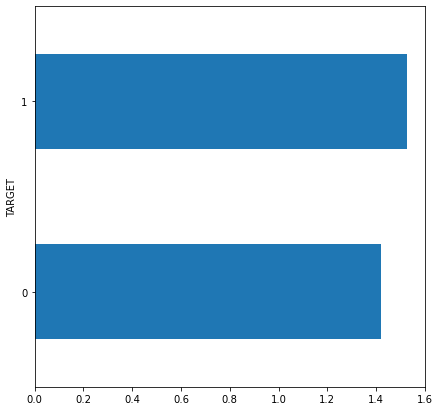

Plotting for column REGION_RATING_CLIENT


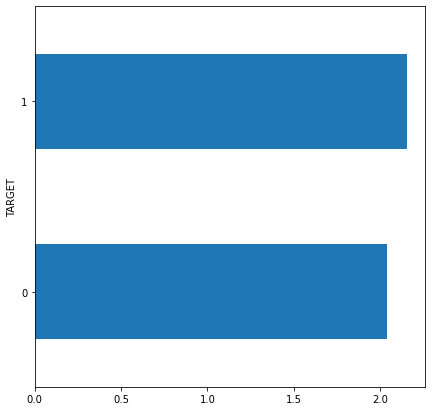

Plotting for column AMT_REQ_CREDIT_BUREAU_WEEK


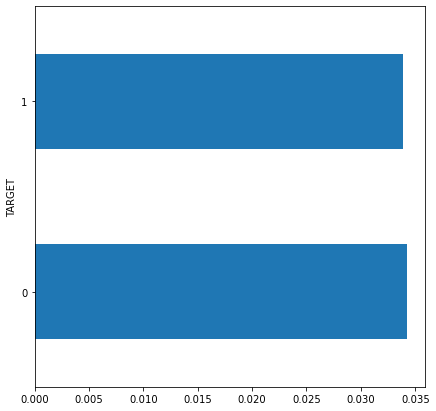

Plotting for column OBS_60_CNT_SOCIAL_CIRCLE


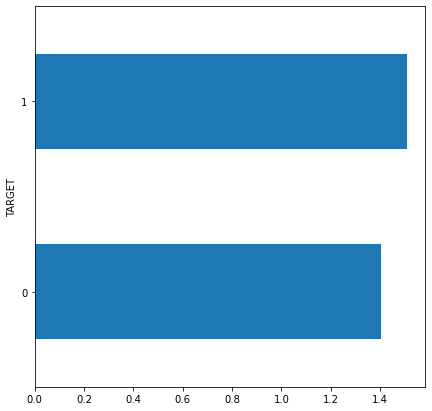

Plotting for column CNT_CHILDREN


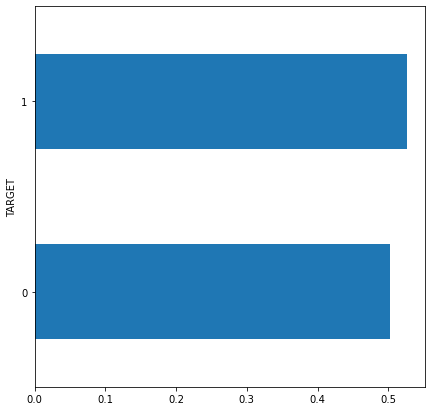

Plotting for column DAYS_ID_PUBLISH


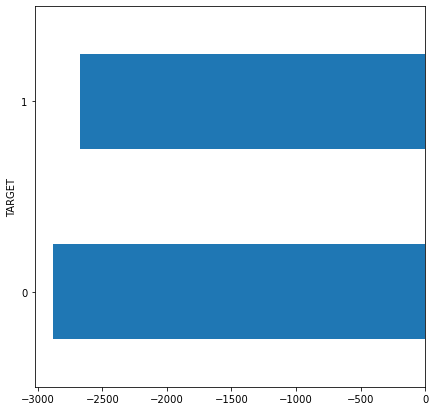

Plotting for column REGION_RATING_CLIENT_W_CITY


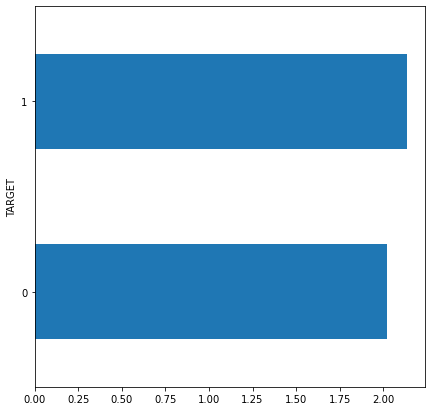

Plotting for column DAYS_EMPLOYED


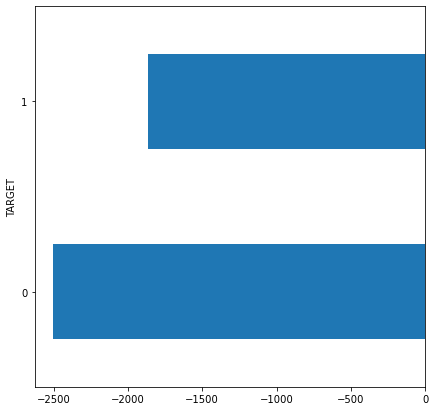

Plotting for column FLAG_MOBIL


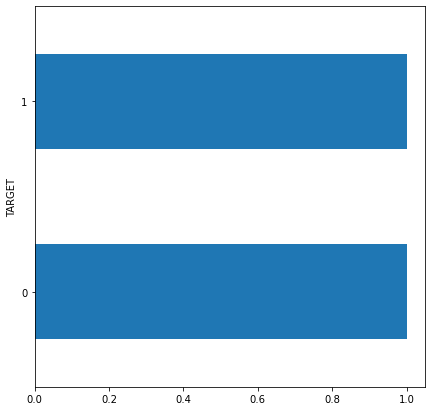

Plotting for column DAYS_BIRTH


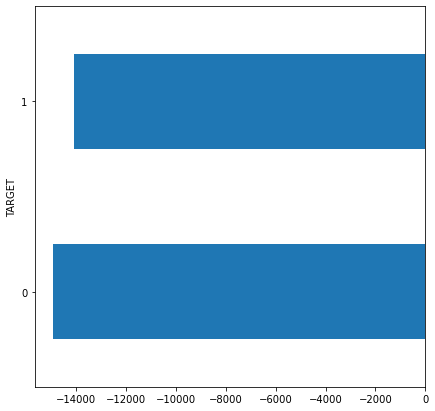

Plotting for column AMT_REQ_CREDIT_BUREAU_YEAR


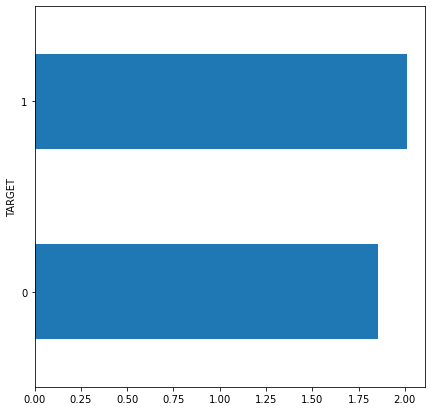

Plotting for column AMT_ANNUITY


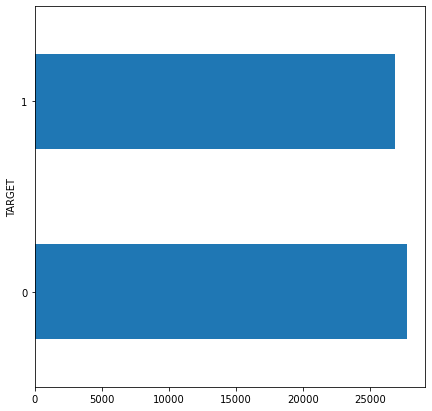

Plotting for column SK_ID_CURR


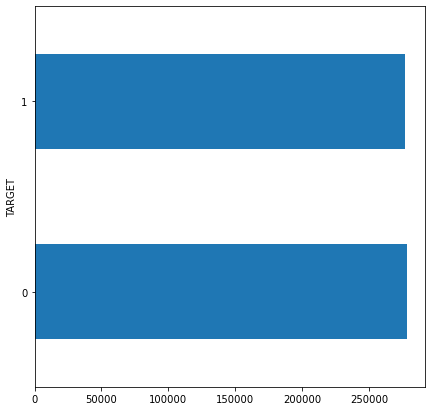

Plotting for column DAYS_LAST_PHONE_CHANGE


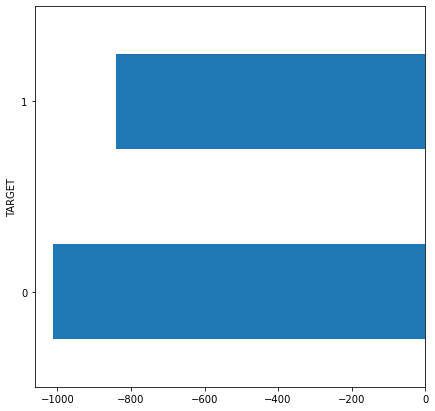

Plotting for column AMT_REQ_CREDIT_BUREAU_QRT


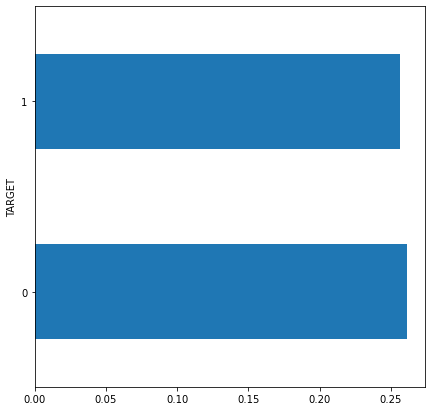

Plotting for column DAYS_REGISTRATION


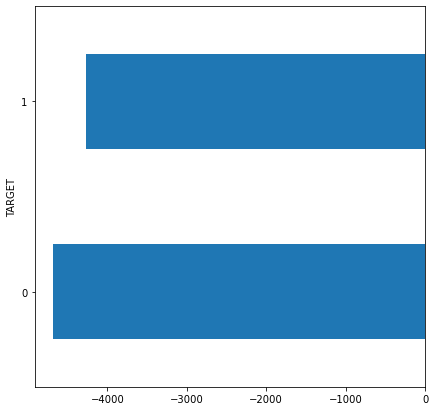

Plotting for column AMT_INCOME_TOTAL


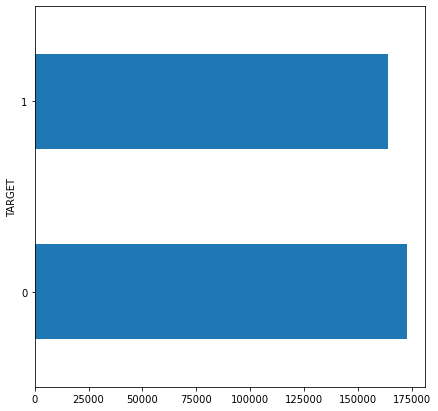

Plotting for column CNT_FAM_MEMBERS


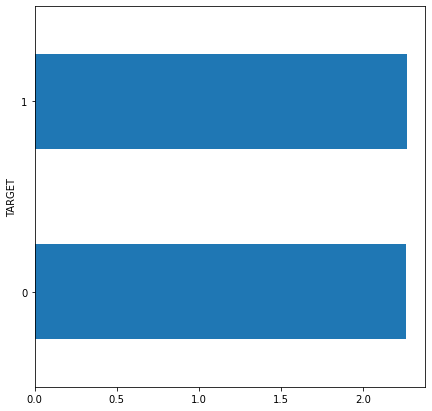

Plotting for column DEF_30_CNT_SOCIAL_CIRCLE


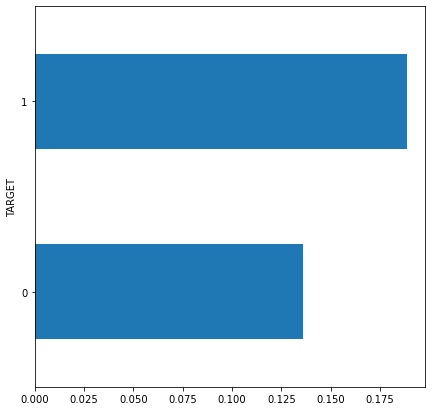

Plotting for column AMT_REQ_CREDIT_BUREAU_DAY


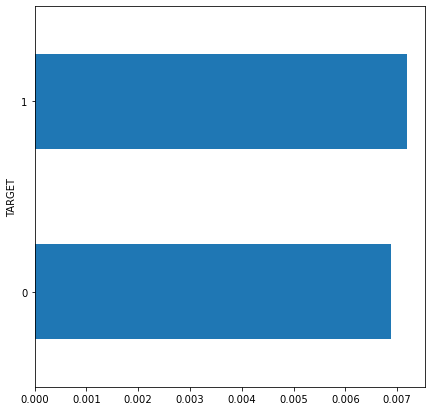

Plotting for column HOUR_APPR_PROCESS_START


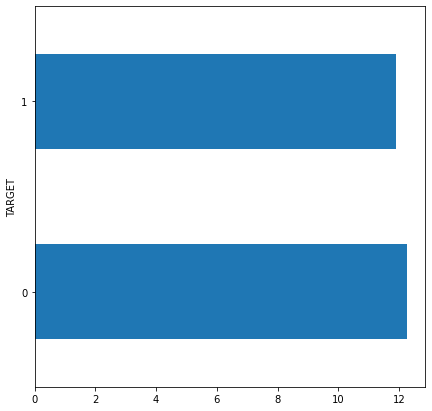

In [117]:
for i in num_variables:
    print('Plotting for column '+i)
    num_var_analysis(app_data, i)

In [118]:
plt.figure(figsize=(10,10))
app_data.groupby(by='TARGET')['AMT_REQ_CREDIT_BUREAU_MON'].mean()

TARGET
0    0.284244
1    0.234334
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Figure size 720x720 with 0 Axes>

#### Key observations:

1. AMT_REQ_CREDIT_BUREAU_YEAR: Higher average number of enquiries about clients to credit bureau one year  before application is indicating higher risk
2. DEF_60_CNT_SOCIAL_CIRCLE: Higher average observation of the clients with social surroundings that defaulted on 60 (days past due) DPD is indicating higher risk
 
3. REGION_POPULATION_RELATIVE: There is lower risk with the clients from higher average relative population
4. AMT_CREDIT: There is higher risk with clients taking loans with lower credit amount.
5. AMT_GOODS_PRICE: There is lower risk with consumer loans having higher goods price on average
6. REGION_RATING_CLIENT: Regions with higer rating are having higher risk
7. CNT_CHILDREN: Clients with higher average number of children are posing higher risk.
8. DAYS_ID_PUBLISH: If the average number of  days before the application is higher for the clients who changed their identity document with which they applied for the loan, then they are posing higher risk
9. DAYS_EMPLOYED: There is lower risk for clients who have been employed at their current job for higher number of days on average.
10.  DAYS_BIRTH: There is lower risk with clients of higher age on average at the time of application
11. AMT_ANNUITY: Clients with lower loan annuity on average pose higher risk
12. DAYS_LAST_PHONE_CHANGE: There is higher risk posed by clients who changed their phone recently before making the application on average

13. DAYS_REGISTRATION: There is higher risk posed by clients who changed their registration recently before making the application on average
14. AMT_INCOME_TOTAL: Clients with higher income level are posing less risk


### Now working on previous application data

We already took care of the missing values in prev_app previously so now checking for outliers 


In [119]:
prev_app.columns #columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [124]:
prev_app_num_cols=list(prev_app.describe().columns) #numerical variables of previous application dataset
prev_app_num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

plotting column SK_ID_PREV


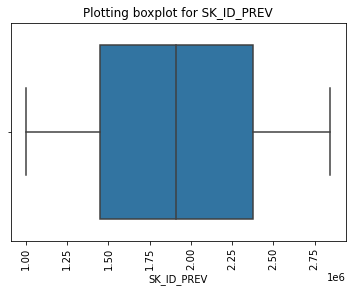

plotting column SK_ID_CURR


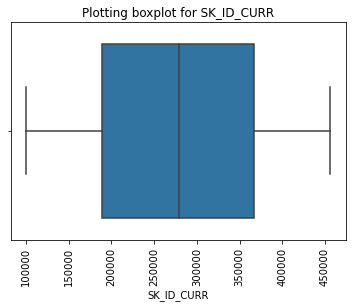

plotting column AMT_ANNUITY


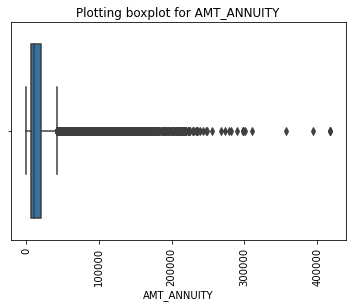

plotting column AMT_APPLICATION


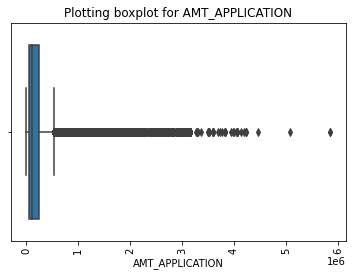

plotting column AMT_CREDIT


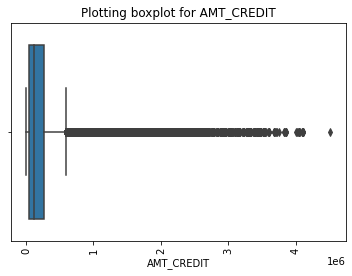

plotting column AMT_GOODS_PRICE


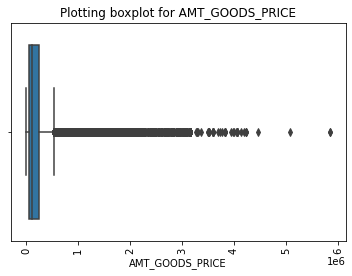

plotting column HOUR_APPR_PROCESS_START


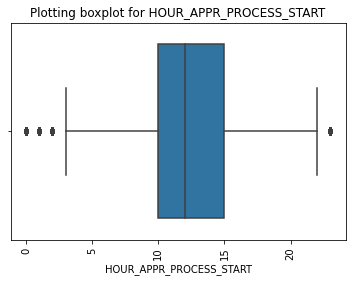

plotting column NFLAG_LAST_APPL_IN_DAY


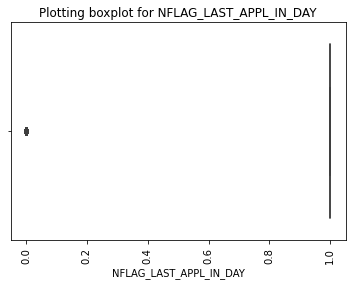

plotting column DAYS_DECISION


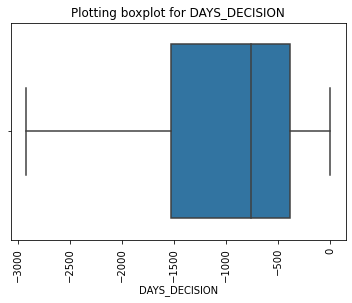

plotting column SELLERPLACE_AREA


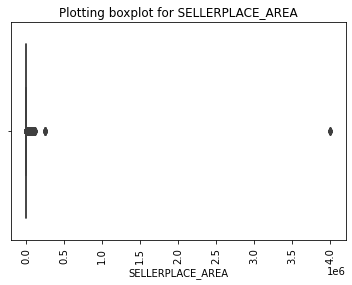

plotting column CNT_PAYMENT


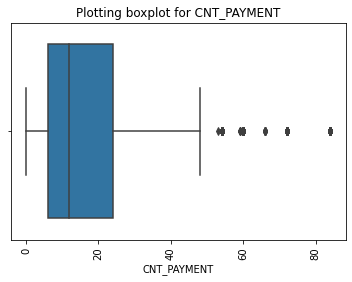

In [125]:
#applying our custom boxplotter function to plot boxplots for every numeric column in prev_data in order to identify outliers
for i in prev_app_num_cols:
    print('plotting column '+i)
    boxplotter(prev_app, i)

In [127]:
prev_app.AMT_ANNUITY.describe()

count    1.246320e+06
mean     1.605938e+04
std      1.492967e+04
min      0.000000e+00
25%      6.327990e+03
50%      1.125000e+04
75%      2.061227e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [126]:
prev_app.AMT_GOODS_PRICE.describe()

count    1.246320e+06
mean     2.326240e+05
std      3.186729e+05
min      0.000000e+00
25%      5.220000e+04
50%      1.125000e+05
75%      2.475000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [128]:
prev_app.CNT_PAYMENT.describe()

count    1.246320e+06
mean     1.671954e+01
std      1.448712e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

**We don't feel there are any true outliers in these variables as most of these outlying points are continous and the values themselves aren't invalid**

### Checking for patterns between Target variable and the variables of previous application data

1. We know that SK_ID_CURR is the common variable between application data (app_data) and previous apprlication data (prev_app).
2. So we can merge the 2 dataframes using SK_ID_CURR
3. Here we only need the SK_ID_CURR and TARGET variable from application data so we will first subset app_data accordingly before merging with prev_app or previous application dataset


In [137]:
app_data2= app_data[['SK_ID_CURR', 'TARGET']]
app_data2.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
4,100007,0
5,100008,0


In [138]:
app_data2.shape #sanity check

(213664, 2)

In [140]:
#let's make a copy of previous application data inorder to use for the merging and analysis so that we don't distur the original dataframe
prev_app2= prev_app.copy()
prev_app2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [141]:
prev_app2.shape #sanity check

(1246320, 26)

In [142]:
#now merging app_data2 and prev_app2
mergedDF= app_data2.merge(prev_app2, on='SK_ID_CURR')
mergedDF.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [144]:
#checking the shape of our merged column
mergedDF.shape

(746111, 27)

In [145]:
#sanity check for the columns
mergedDF.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Data analysis

**Contract status vs Target**

In [146]:
mergedDF.NAME_CONTRACT_STATUS.value_counts() #checking the value counts of previous loan's contract status

Approved        593283
Refused         145903
Canceled          6236
Unused offer       689
Name: NAME_CONTRACT_STATUS, dtype: int64

In [161]:
#percentage contribution from each contract status category(previous loan) to the total number of defaulters
mergedDF.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False)*100 

NAME_CONTRACT_STATUS
Refused         12.017573
Unused offer     9.579100
Canceled         8.370750
Approved         7.909379
Name: TARGET, dtype: float64

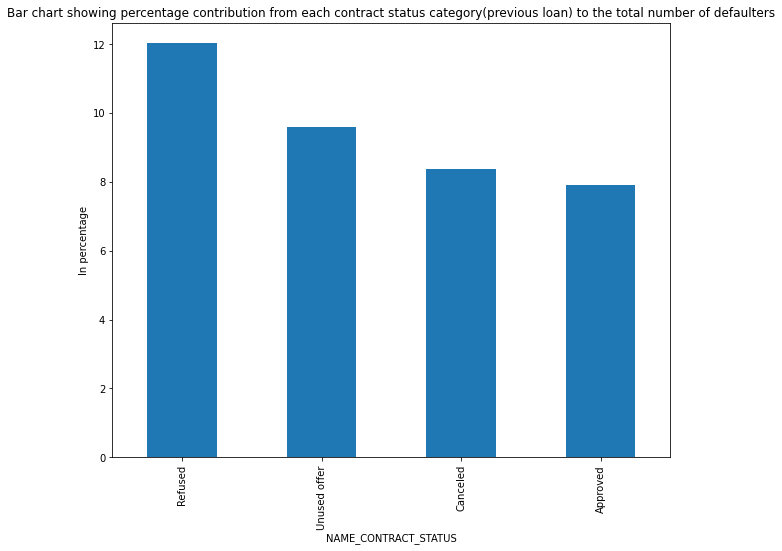

In [167]:
#Bar chart showing percentage contribution from each contract status category(previous loan) to the total number of defaulters
plt.figure(figsize=(10,8))
(mergedDF.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False)*100).plot.bar()
plt.title('Bar chart showing percentage contribution from each contract status category(previous loan) to the total number of defaulters')
plt.ylabel('In percentage')
plt.show()

#### Observation: 

So clients who were refused the previous loan application are more likely to default than those who were approved 

**AMT_CREDIT vs Target**

In [173]:
mergedDF.AMT_CREDIT.describe()

count    7.461110e+05
mean     2.447406e+05
std      3.507153e+05
min      0.000000e+00
25%      4.812750e+04
50%      1.095570e+05
75%      2.636865e+05
max      4.104351e+06
Name: AMT_CREDIT, dtype: float64

In [183]:
#Grouping by defaulters and all other cases and then finding the median credit amount of previous loan
mergedDF.groupby(by='TARGET')['AMT_CREDIT'].median()

TARGET
0    109156.5
1    115690.5
Name: AMT_CREDIT, dtype: float64

#### Observation:

No significant observation found as median credit amount on previous loan for both defaulters and non defaulters are pretty close to each other. So we can't draw any strong conclusion here

In [187]:
mergedDF.NAME_CLIENT_TYPE.value_counts()

Repeater     503383
New          176474
Refreshed     65770
XNA             484
Name: NAME_CLIENT_TYPE, dtype: int64

In [190]:
#NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS vs TARGET
piv2= pd.pivot_table(index='NAME_CLIENT_TYPE', columns='NAME_CONTRACT_STATUS', values='TARGET', aggfunc=np.mean, data=mergedDF)

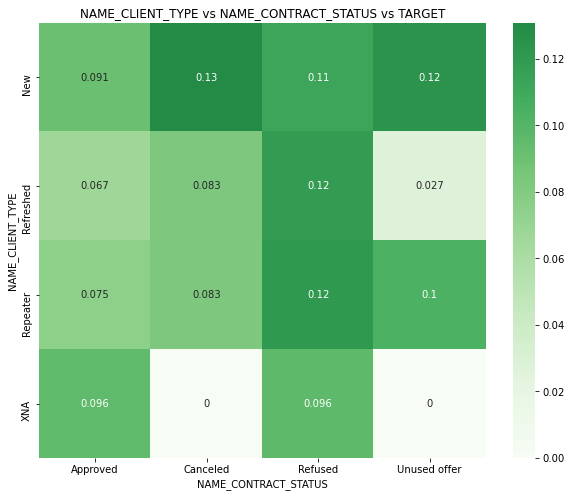

In [195]:
#creating heatmap
plt.figure(figsize=(10,8))
sns.heatmap(piv2, cmap='Greens', center=np.mean(mergedDF.TARGET), annot=True)
plt.title('NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS vs TARGET')
plt.show()

#### Observations:

As we can see from the above heatmap, clients of all types(Repeater, New, Refreshed or XNA) who had been refused the previous loan application are more likely to default than others. We can also see that new clients are likely to be more risky to give loans to than clients who are repeaters, refreshed or XNA.